In [1]:
# Import required packages 
import pandas as pd
import numpy as np
from numpy import *

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import yfinance as yf 
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

import pyfolio as pf
import scipy.stats as scs
import quandl
import pandas_datareader as pdr
from datetime import date
from scipy.stats import norm
from math import *
import random
from random import gauss

##### MODERATELY AGGRESSIVE: A Moderately Aggressive investor primarily values higher long-term returns and is willing to accept significant risk. This investor believes higher long-term returns are more important than protecting principal. A Moderately Aggressive investor may endure large losses in favor of potentially higher long-term returns. Liquidity may not be a concern to a Moderately Aggressive investor. 

### Guide to interpret

A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the period of time involved. 

Expressed as a percentage, cumulative return is the total change in the price of an investment over a set time period—an aggregate return, not an annualized one.

A moving average helps cut down the amount of "noise" on a price chart. Look at the direction of the moving average to get a basic idea of which way the price is moving. If it is angled up, the price is moving up (or was recently) overall; angled down, and the price is moving down overall; moving sideways, and the price is likely in a range.

volatility is the degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns.

#### Guide
Value at Risk, or VaR, is a threshold with a given confidence level that losses will not (or more accurately, will not historically) exceed a certain level.

Example: VaR(95) = -2.3%
95% certain that losses will not exceed -2.3% in a given day based on historical values.

Conditional Value at Risk, or CVaR, is an estimate of expected losses sustained in the worst 1 - x% of scenarios.

Example:
CVaR(95) = -2.5%
In the worst 5% of cases, losses were on average exceed -2.5% historically.

In [2]:
#portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), index=returns.index) to calc portfolio returns

In [3]:
#Funciton to calculate moving averages and plot
def mva(name,df):
    close = df[name]
    mavg = close.rolling(window=100).mean()

    close.plot(title=name,color='orange')
    mavg.plot(title='mavg', color='black',label='mavg100')
    plt.legend()

In [4]:
def choose(adj_close,index):
    print('Closing prices:')
    adj_close.plot(title='Closing prices', figsize=(12,7))
    plt.show()
    
    print("Stock returns")
    returns = adj_close.pct_change().dropna()
    returns.plot(title='Daily returns of the considered assets', figsize=(12,7))
    
    print('Returns distribution')
    returns.hist(bins=5,sharex=True, figsize=(12,7))
    plt.show()
    
    print('Cumulative stock returns')
    #Cumulative returns
    ret_cum =  returns.cumsum()
    # Plot the cumulative returns
    ret_cum.plot(figsize=(12,7), title='Cumulative returns')
    plt.show()
    
    print('Moving averages')
    plt.figure(figsize = (20,10))  # create a plot figure
    count = 1
    for ind in index:
        plt.subplot(2,3,count)
        mva(ind,adj_close)
        count = count+1
    plt.show()
    
    ##Stocks returns rate and risk
    ##average of returns (Return Rate) and the standard deviation of returns (Risk)
    print('Risk versus returns of the stocks:')
    plt.figure(figsize=(12,7))
    plt.scatter(returns.mean(), returns.std())
    plt.title('Risk vs returns')
    plt.xlabel('Expected returns')
    plt.ylabel('Risk')
    plt.xlim(0,0.005)
    for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
        plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    plt.show()
    
    # Define the minumum of periods to consider 
    print('Stock volatility')
    min_periods = 100 
    # Calculate the volatility
    vol = returns.rolling(min_periods).std() * np.sqrt(min_periods) 
    # Plot the volatility
    vol.plot(figsize=(12,7), title='Volatility')
    plt.show()
    
    print('Value at risk and Expected shortfall')
    ret = pd.DataFrame(returns)
    var_level = 95
    #VaR and Expected shortfall
    for col in ret.columns: 
        var_95 = np.percentile(ret[col], 100 - var_level)
        cvar_95 = ret[col][ret[col] <= var_95].mean() 
        print('VaR for',col,'is:',round((var_95*100),2),'%')
        print('CVaR for',col,'is:',round((cvar_95*100),2),'%')
        print('\n')

# Choosing the stock index to invest in

[*********************100%***********************]  5 of 5 downloaded
Closing prices:


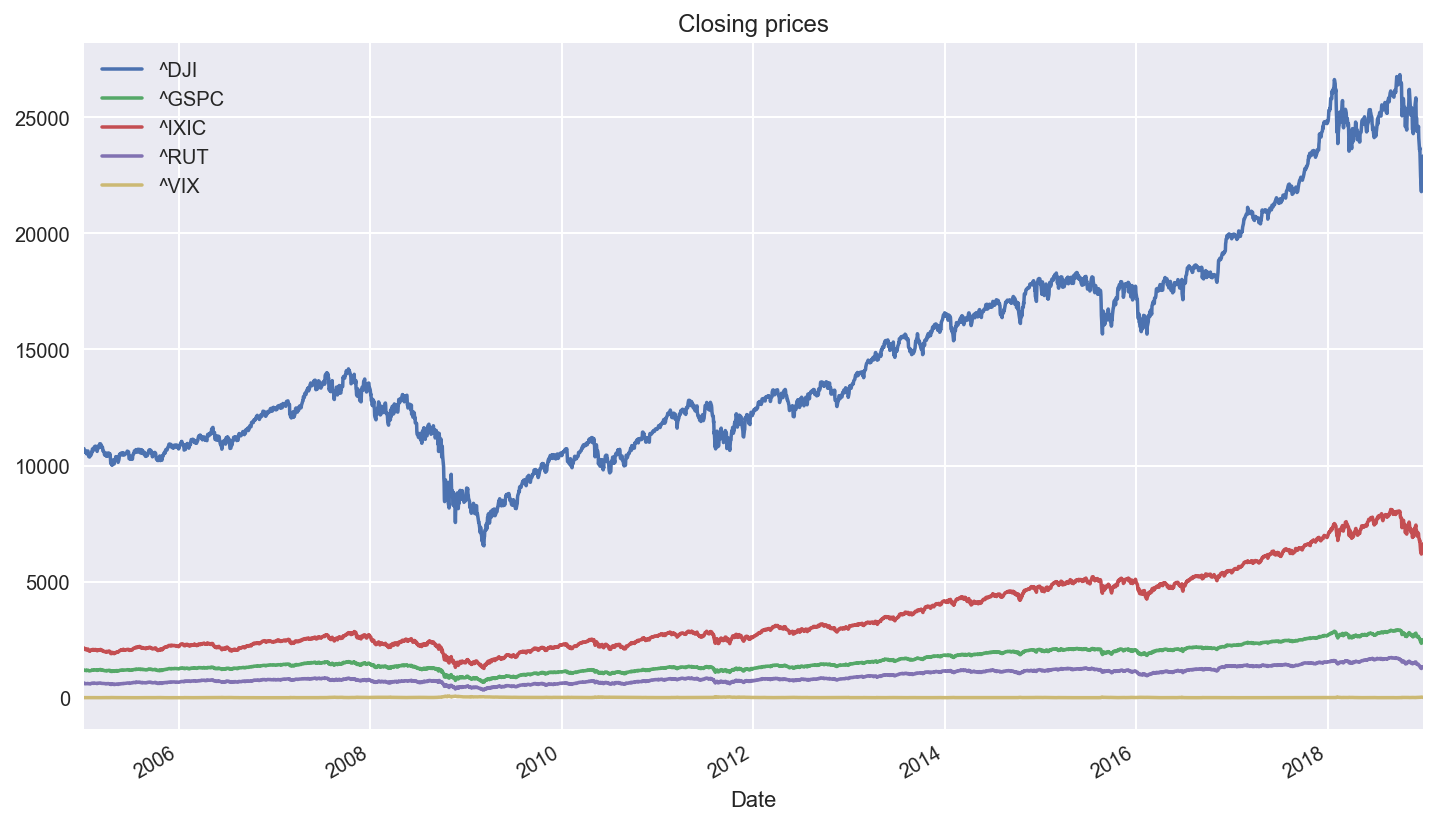

Stock returns
Returns distribution


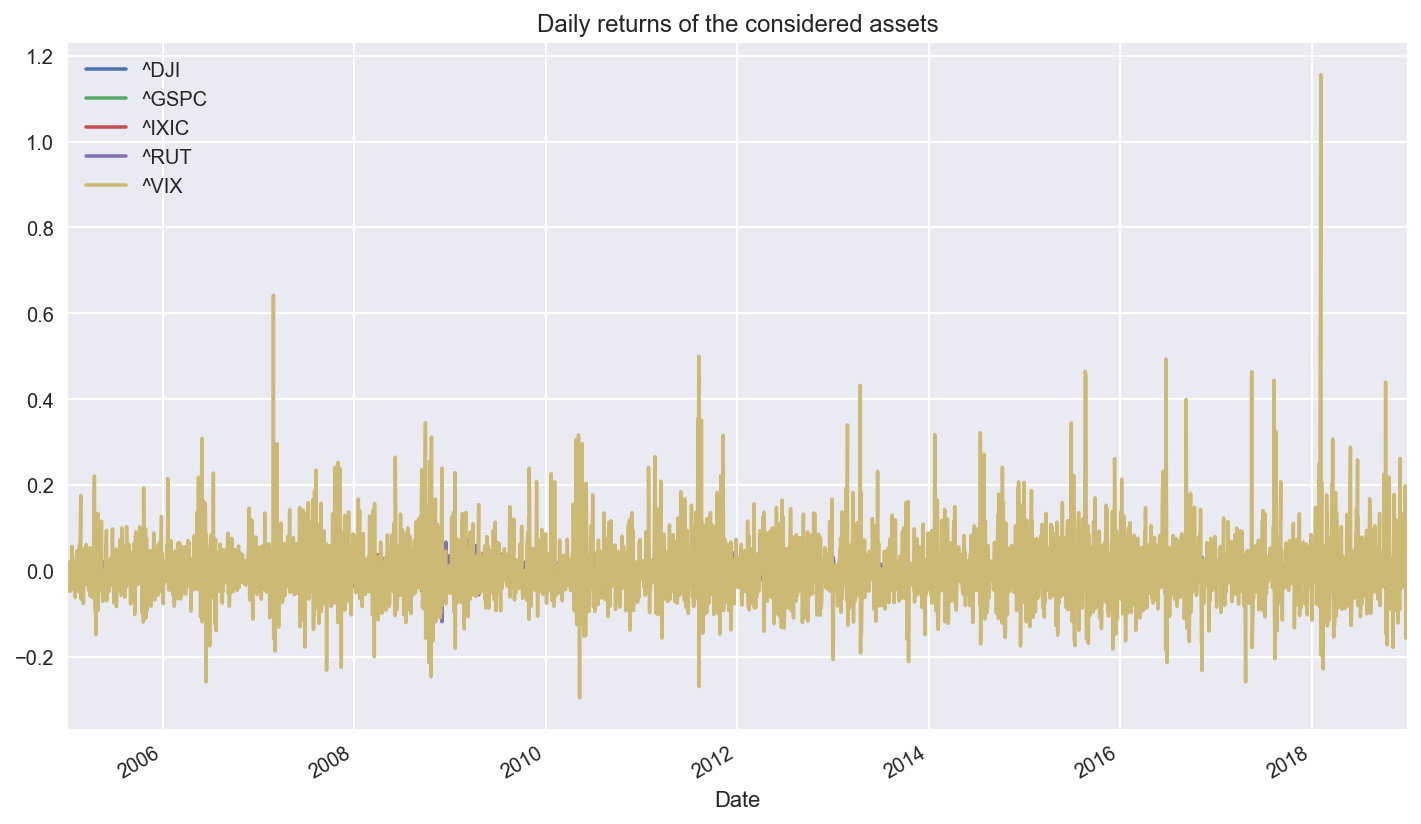

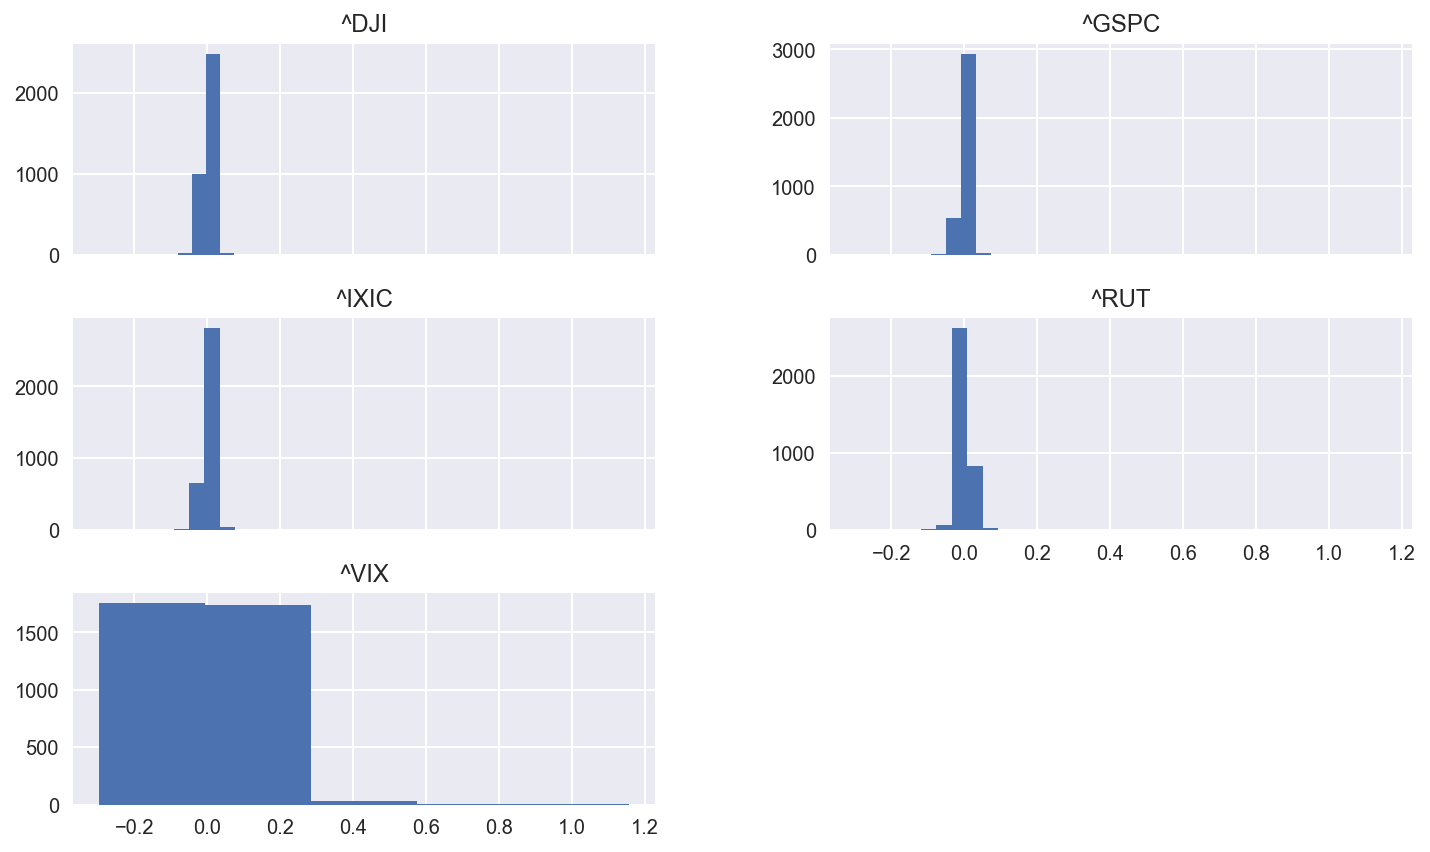

Cumulative stock returns


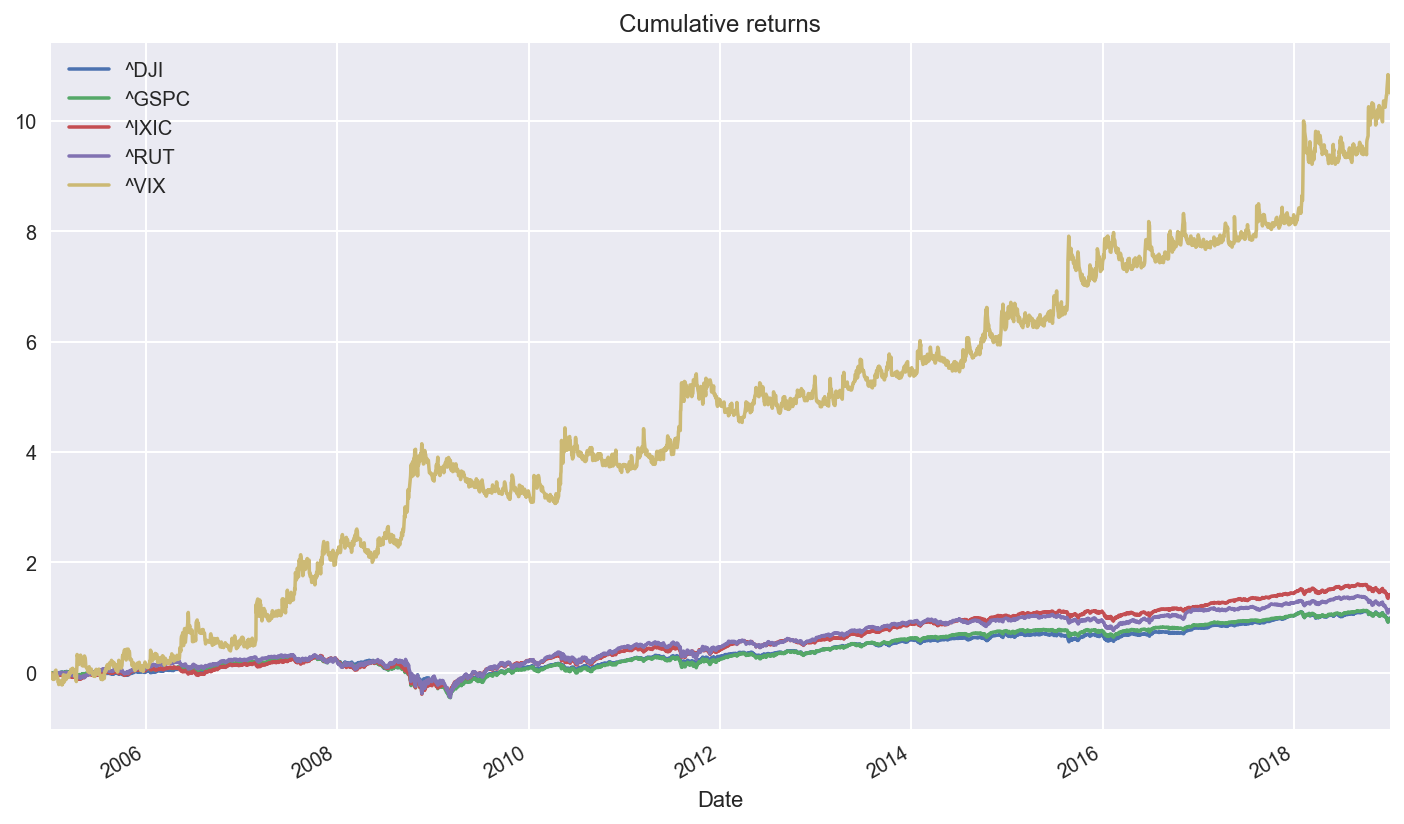

Moving averages


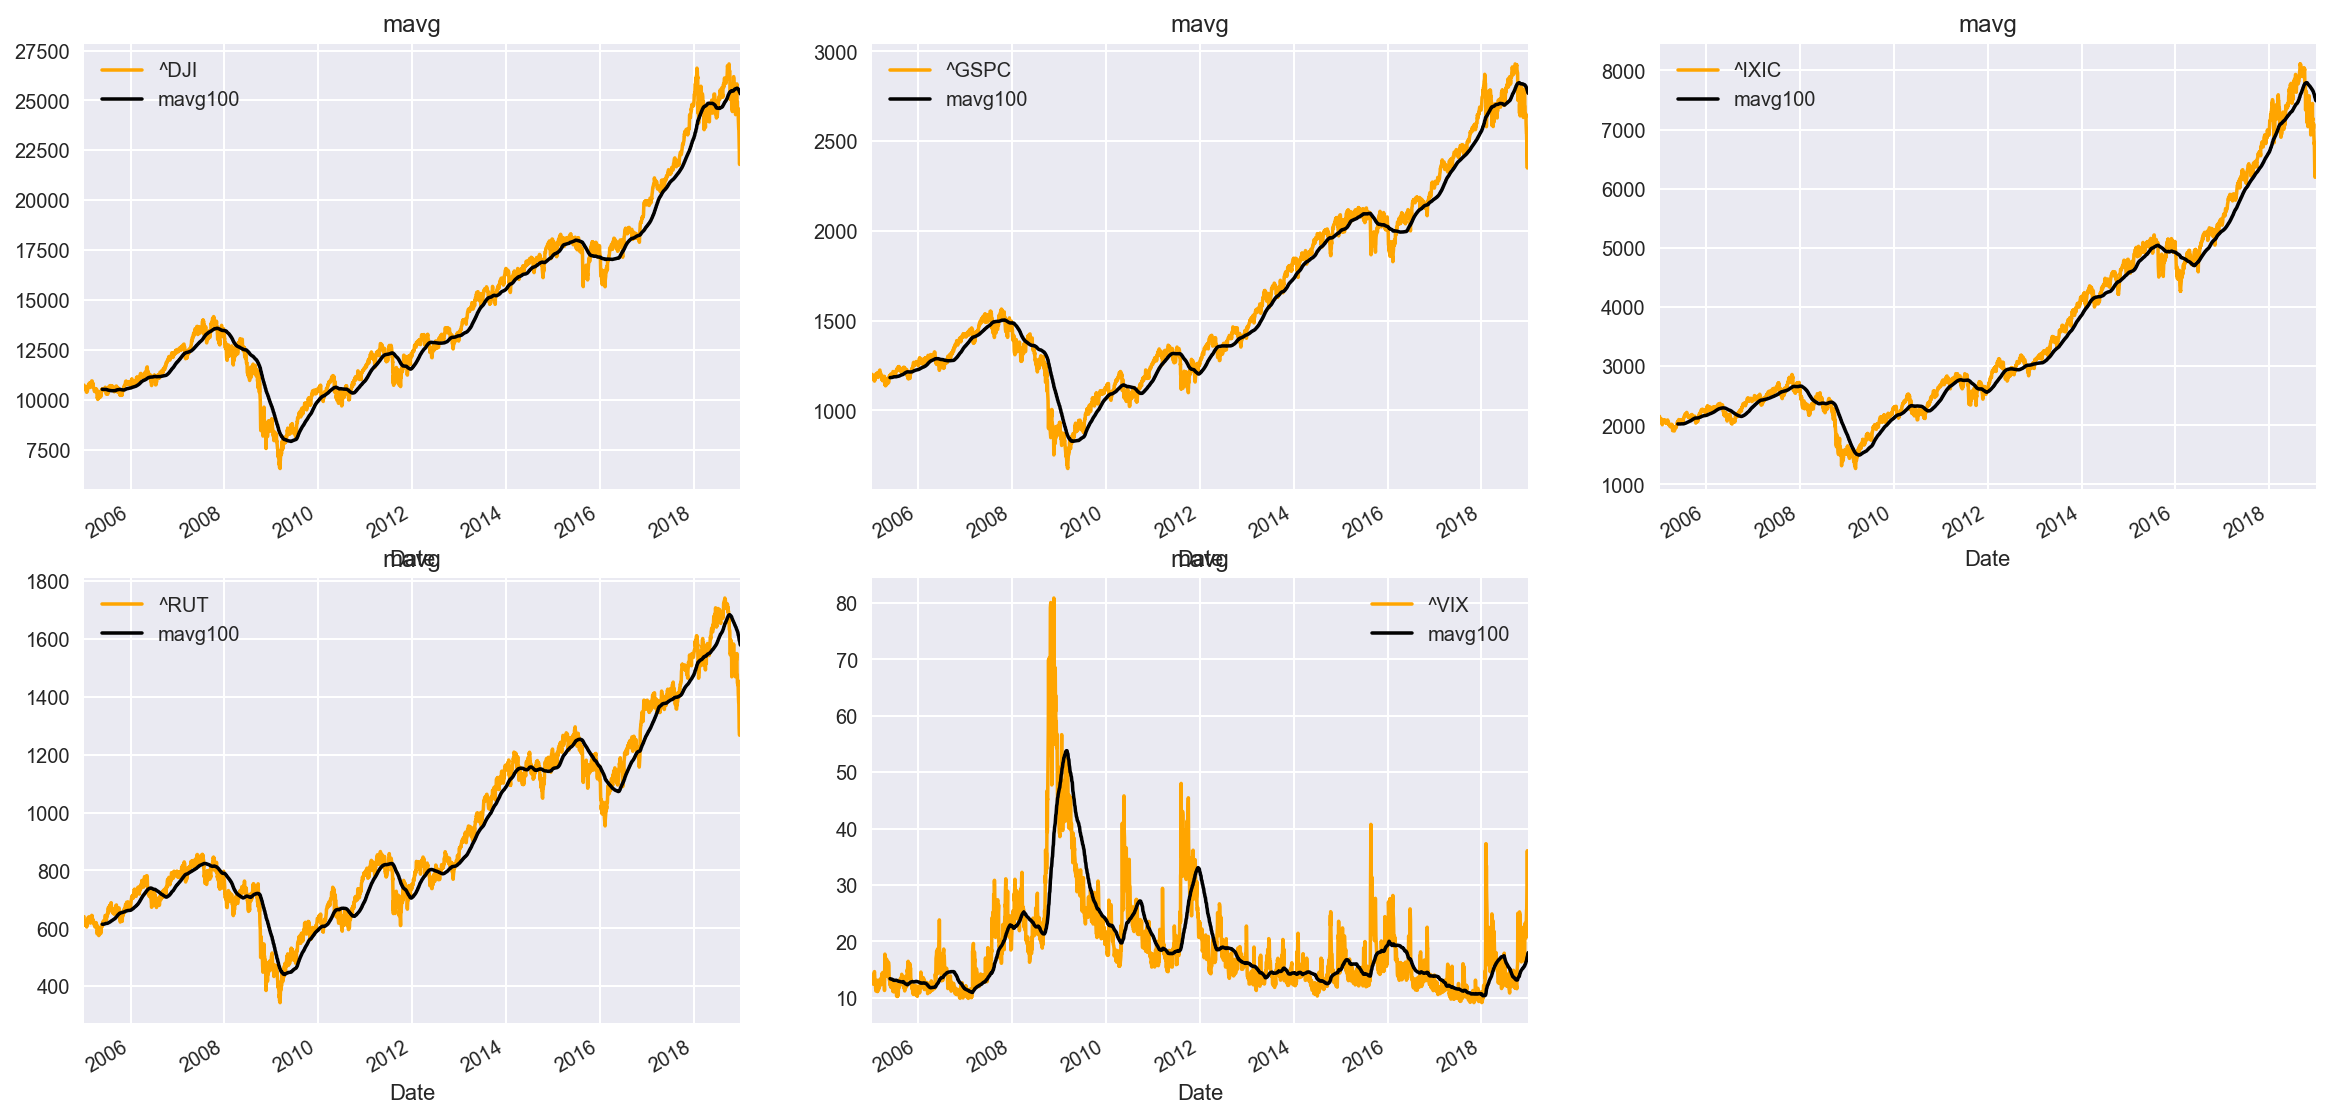

Risk versus returns of the stocks:


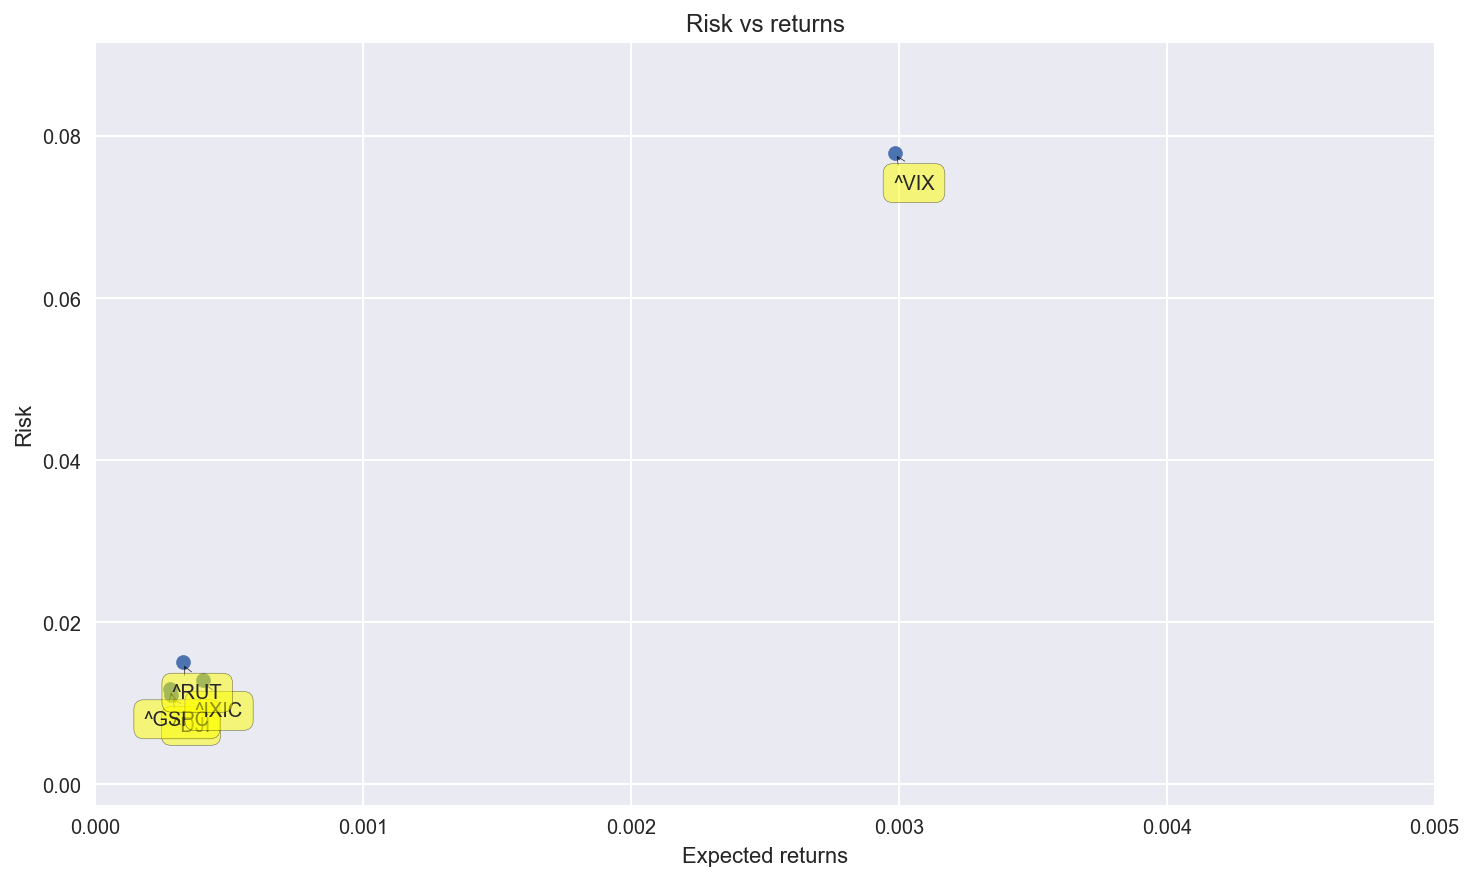

Stock volatility


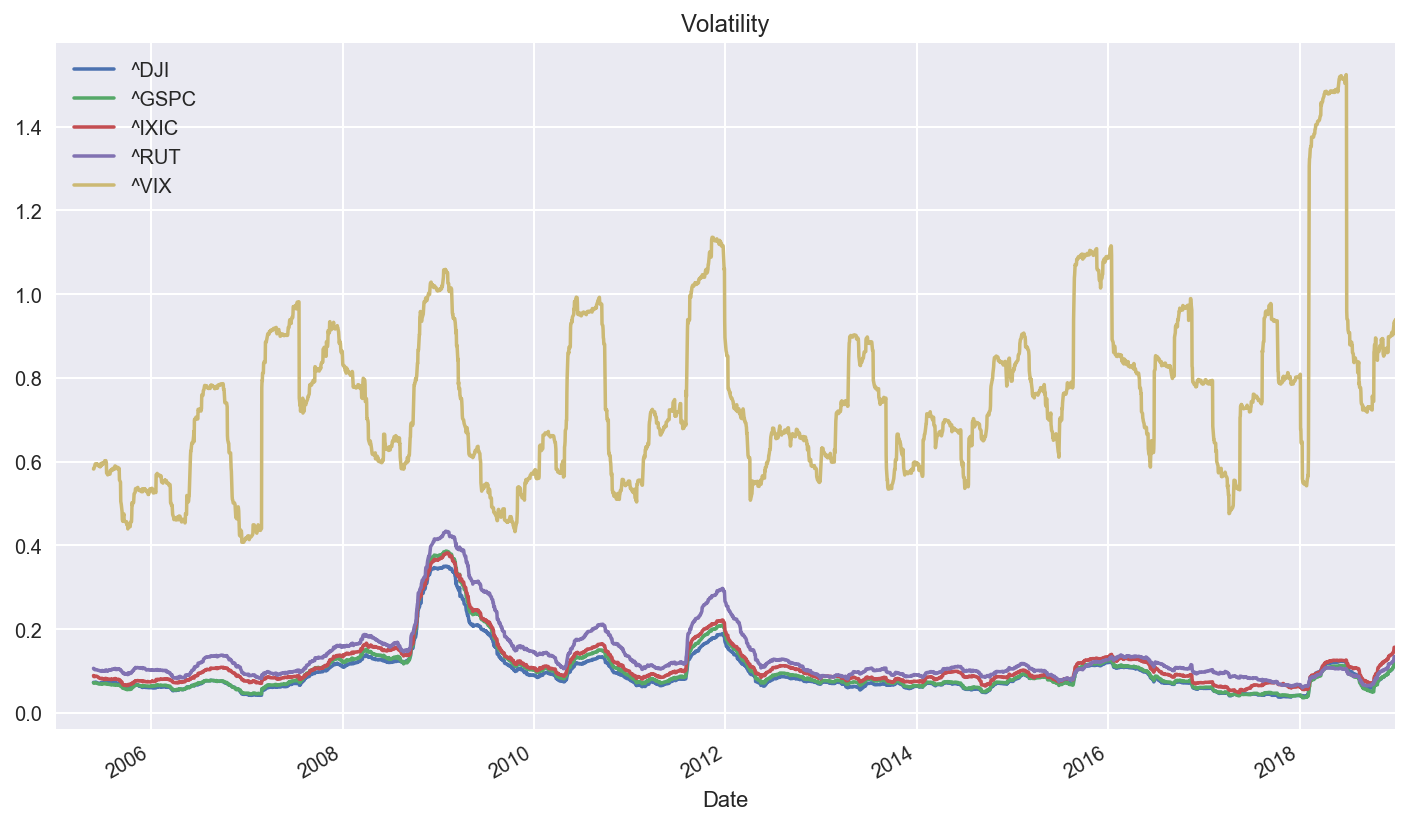

Value at risk and Expected shortfall
VaR for ^DJI is: -1.66 %
CVaR for ^DJI is: -2.7 %


VaR for ^GSPC is: -1.81 %
CVaR for ^GSPC is: -2.93 %


VaR for ^IXIC is: -2.04 %
CVaR for ^IXIC is: -3.11 %


VaR for ^RUT is: -2.34 %
CVaR for ^RUT is: -3.57 %


VaR for ^VIX is: -9.91 %
CVaR for ^VIX is: -13.68 %




In [5]:
index = ['^DJI', '^GSPC', '^IXIC', '^RUT','^VIX']
START_DATE = '2005-01-01'
END_DATE = '2018-12-31'
index_prices = yf.download(index, start=START_DATE, end=END_DATE, adjusted=True)
index_prices = index_prices['Adj Close'].dropna()
choose(index_prices,index)

# Invest in DJI!!!!

Looking at the closing prices, we can see that Dow Jones industrial average has the highest of all the closing prices. Followed by IXIC, GSPC, RUT and finally VIX.

The daily returns of VIX seems to dominate the returns of all the other stock indices, but that doesn't necessarily mean that VIX is the best index to invest in. 

The returns distribution for all the stocks are almost normal except for the distribution of VIX which is skewed to the right.

The cumulative returns of VIX seems to be unusually higher than that of any other stock. The cumulative returns of the others seems to be at par with each other. 

The moving averages plot of DJI, GSPC and IXIC show an ever growing trend with one or two drops in between. RUT has comparatively more number of drops. But, VIX shows a very weird trend of drops and raises throughout. VIX can definitely not be invested in, keeping in mind this trend. 

The risk v/s returns graph shows the risk involved in VIX to be very high but with higher returns. Although the person is a moderate to aggressive risk taker, the MVA graph clearly showed a neutral trend and hence, VIX is better not to be invested in. The other stock indices show a similar amount of risk involved.

The volatility of all the stocks also seem to be almost similar, with the exception of VIX which is very high, again giving another reason to not invest in VIX. 

The VaR is the lowest for DJI and also, the expected shortfall is also the lowest. And hence, go with DJI for investment in a stock!

In [6]:
# Parameter Definitions for Simulation

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in the prediction time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path


In [7]:
start_date = '2019-11-01'
end_date = '2019-11-30'
pred_end_date = '2020-03-31'

dji = yf.download('^DJI', start=start_date, end=end_date, adjusted=True)[['Adj Close']]
dji = dji.reset_index()
print(dji.head())
print(dji.tail())

[*********************100%***********************]  1 of 1 downloaded
        Date  Adj Close
0 2019-11-01   27347.36
1 2019-11-04   27462.11
2 2019-11-05   27492.63
3 2019-11-06   27492.56
4 2019-11-07   27674.80
         Date  Adj Close
15 2019-11-22   27875.62
16 2019-11-25   28066.47
17 2019-11-26   28121.68
18 2019-11-27   28164.00
19 2019-11-29   28051.41


Initial stock price: 28051.41
Time increments: 1
No of days for predicting: 87
Time points: 87.0
Time progression array: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Returns for November 2019: 0.001344598347777482
Standard deviation for November 2019 (Sigma): 0.003428463983271569


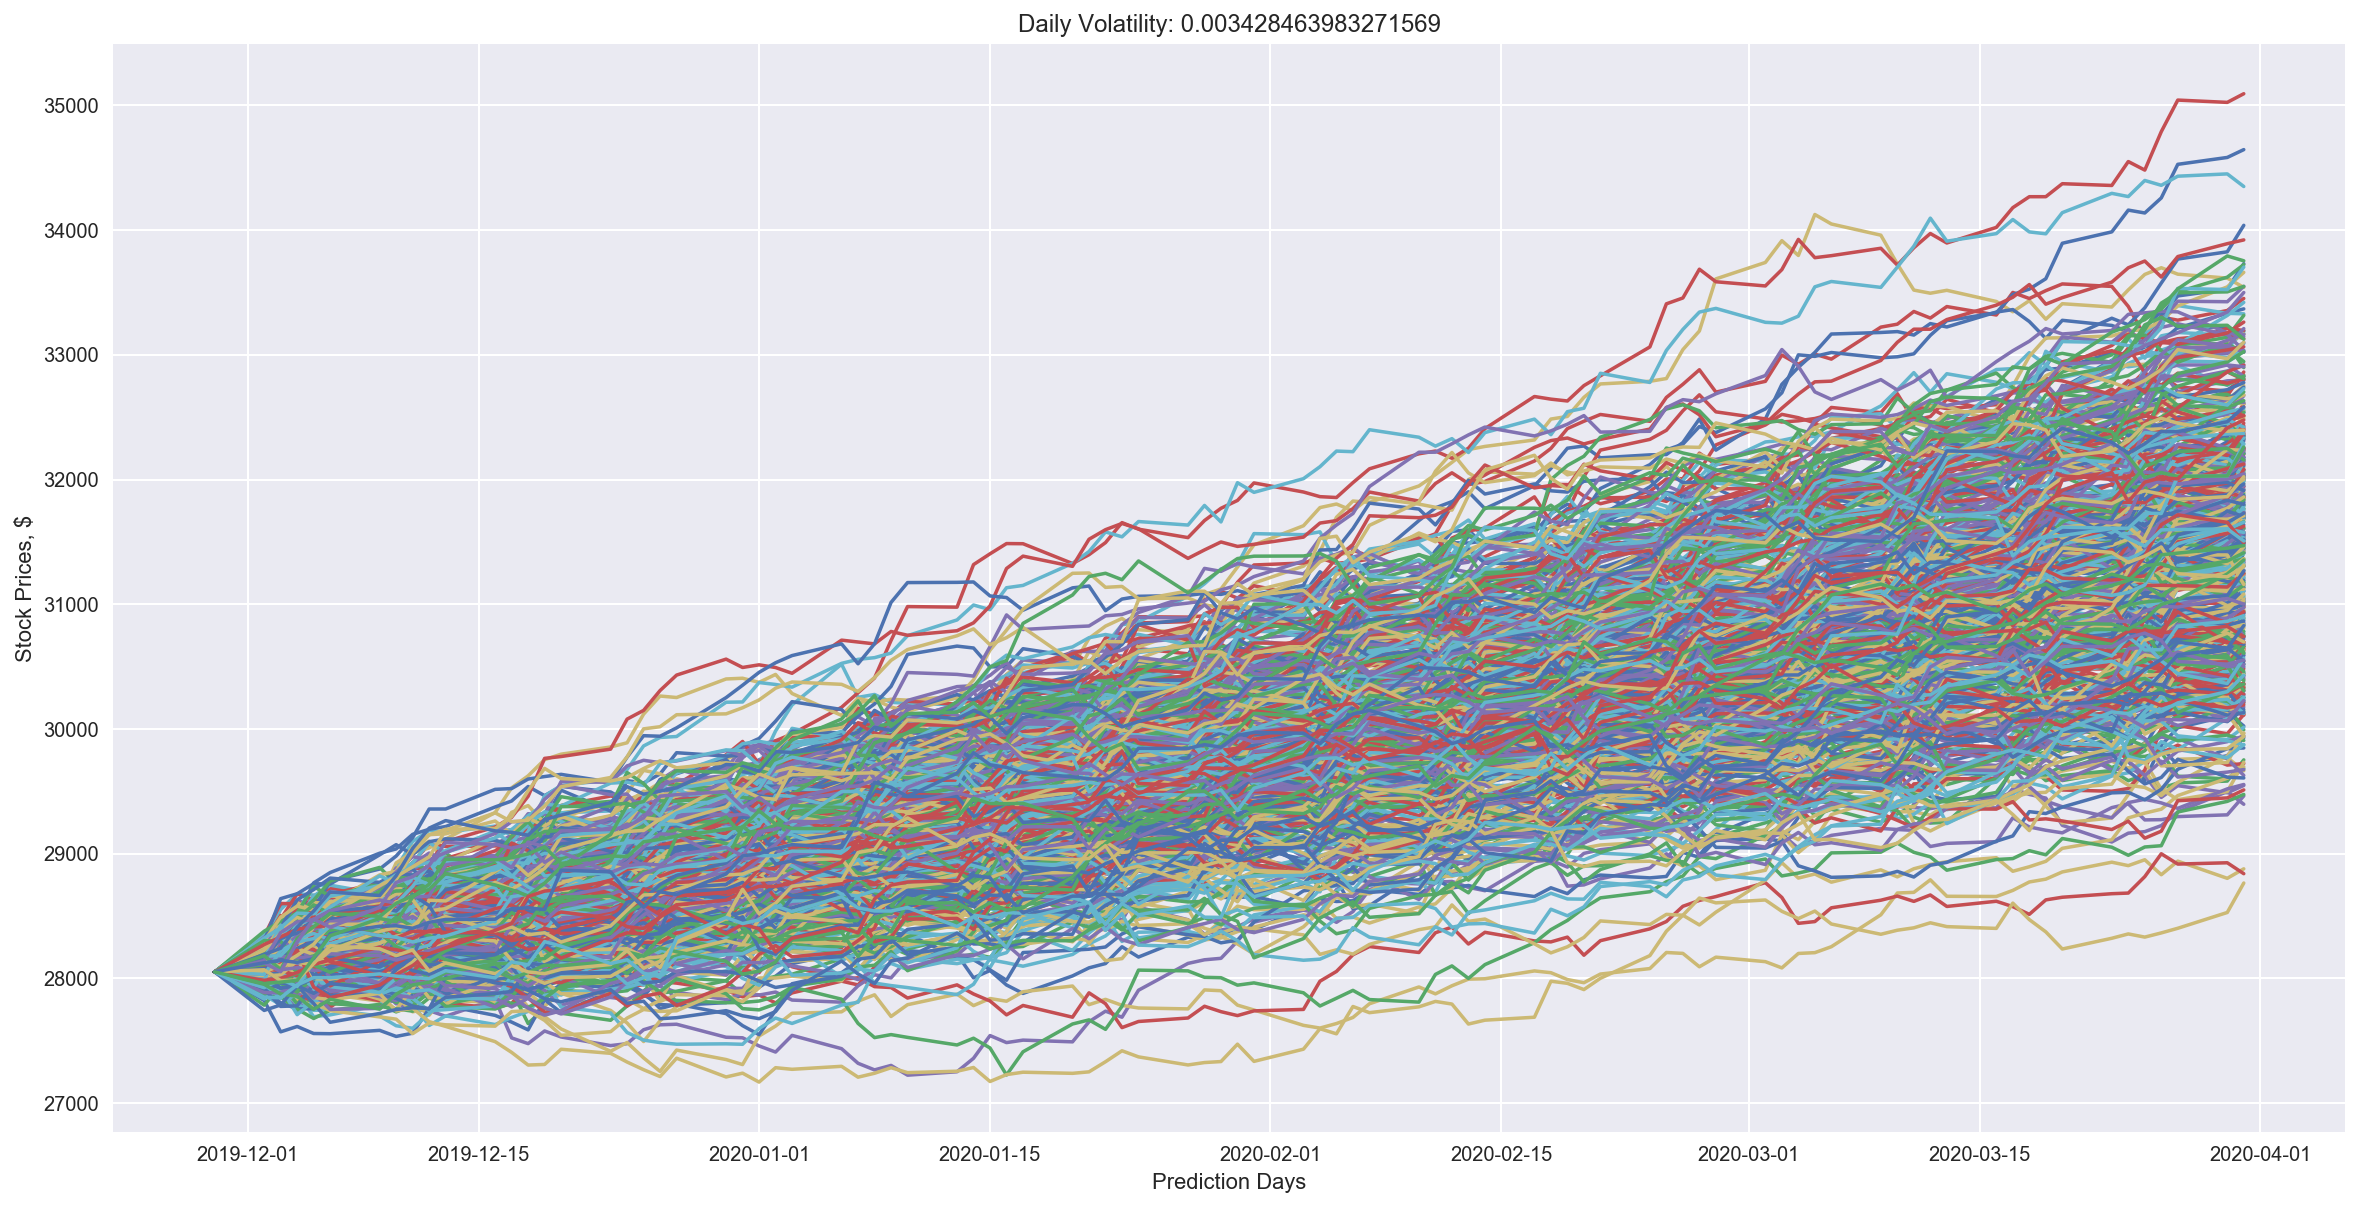

In [8]:
#Initial stock price
end = dji.loc[dji.shape[0] - 1, "Adj Close"]
print('Initial stock price:',end)

#Time increments dt
dt = 1
print('Time increments:',dt)

#No of days to be predicted
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
              format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
              end = pd.to_datetime(pred_end_date, 
              format = "%Y-%m-%d")).to_series(
              ).map(lambda x: 
              1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays
print('No of days for predicting:',T)

#Time points
N = T / dt
print('Time points:',N)

#Time progression array
t = np.arange(1, int(N) + 1)
print('Time progression array:',t)

#Mean returns
returns = (dji.loc[1:, 'Adj Close'] - \
          dji.shift(1).loc[1:, 'Adj Close']) / \
          dji.shift(1).loc[1:, 'Adj Close']

mu = np.mean(returns)
print('Returns for November 2019:',mu)

#Standard deviation
sigma = np.std(returns)
print('Standard deviation for November 2019 (Sigma):',sigma)

#array for random
scen_size = 500
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}

#Brownian path
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

#Drift and diffusion
drift = (mu - 0.5 * sigma**2) * t
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

#Predictions
S = np.array([end * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[end] for scen in range(scen_size)]), S))

# Plotting the simulations
plt.figure(figsize = (20,10))

for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = dji["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, $')
    plt.xlabel('Prediction Days')
    
plt.show()

In [9]:
maxi = S.max()
mini = S.min()

print('Max the price can go to:',maxi)
print('Min the price can go to:',mini)

Max the price can go to: 35093.49778200577
Min the price can go to: 27167.95036128826


In [10]:
ret_rate_max = (maxi - end)/end * 100
ret_rate_min = (mini - end)/end * 100

print('Max the return rate can go to:',ret_rate_max,'%')
print('Min the return rate can go to:',ret_rate_min,'%')

Max the return rate can go to: 25.10422036541396 %
Min the return rate can go to: -3.1494304161956137 %


# Choosing the stock to invest in

Select best 4 out of 8

In [11]:
ticker = ['AAPL', 'JPM','TPR','WHR','CRC','WD','INFY','BABA']
START_DATE = '2005-01-01'
END_DATE = '2018-12-31'
prices_stock = yf.download(ticker, start=START_DATE, end=END_DATE, adjusted=True)
prices_stock = prices_stock['Adj Close']

[*********************100%***********************]  8 of 8 downloaded


### Choose large cap stock

Closing prices:


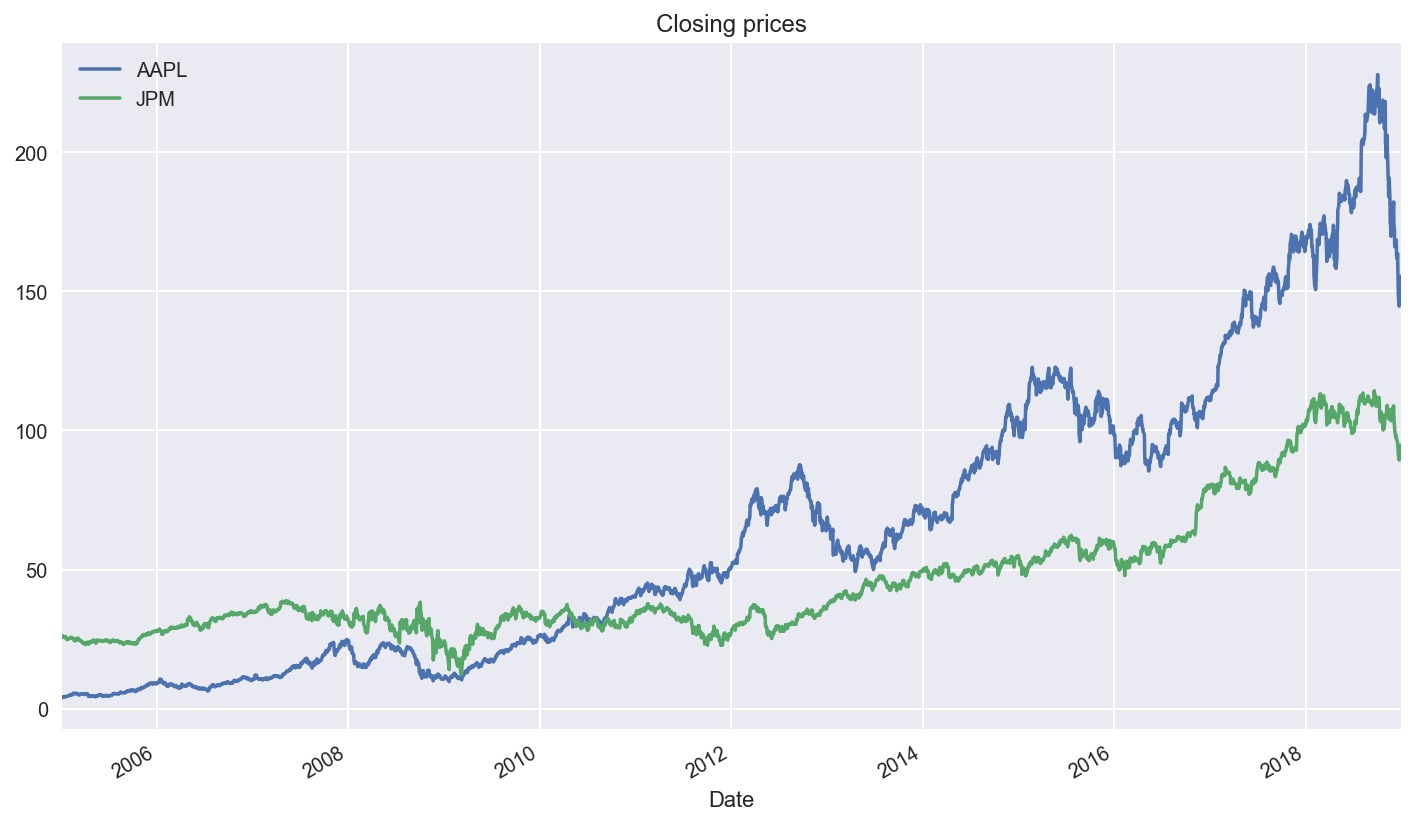

Stock returns
Returns distribution


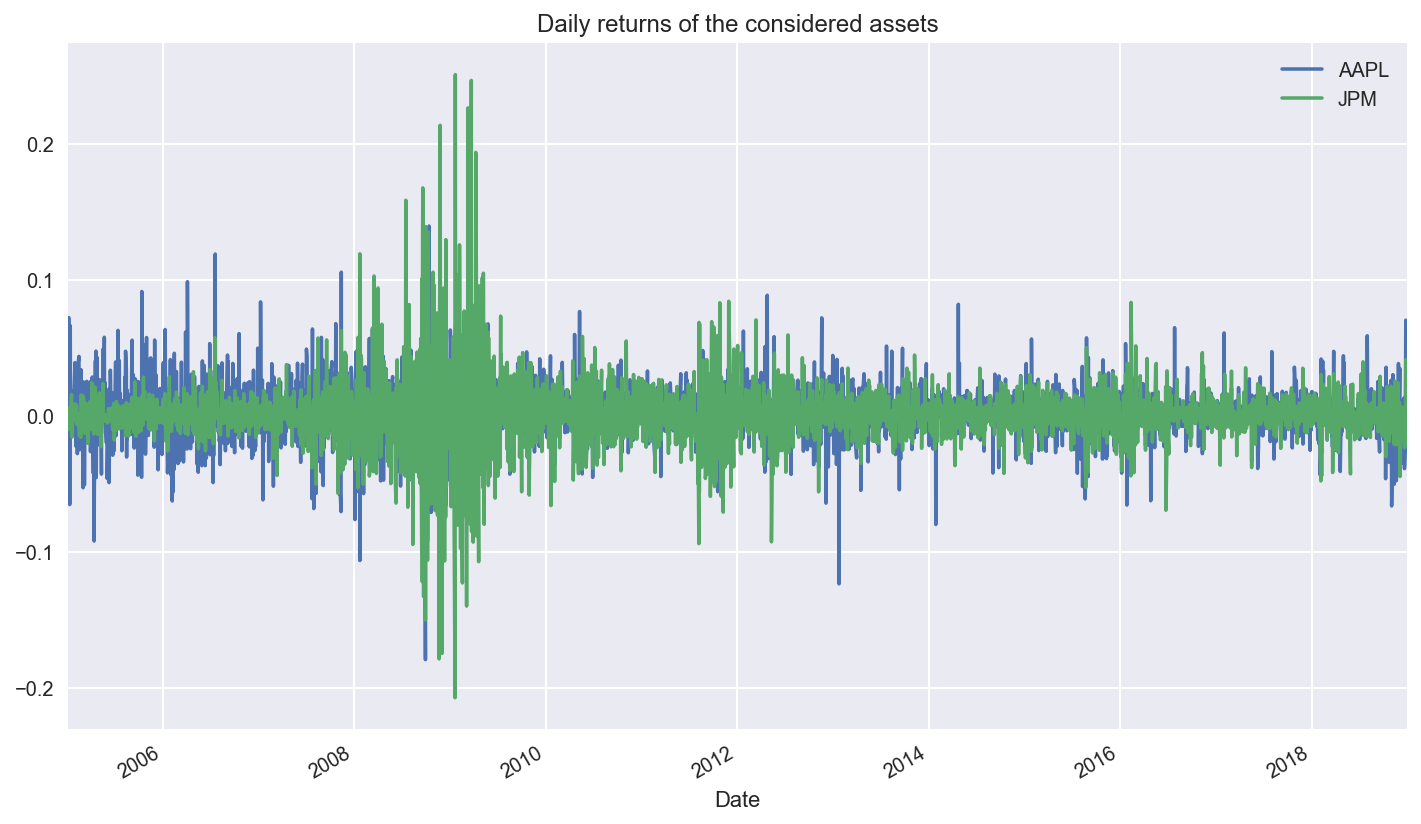

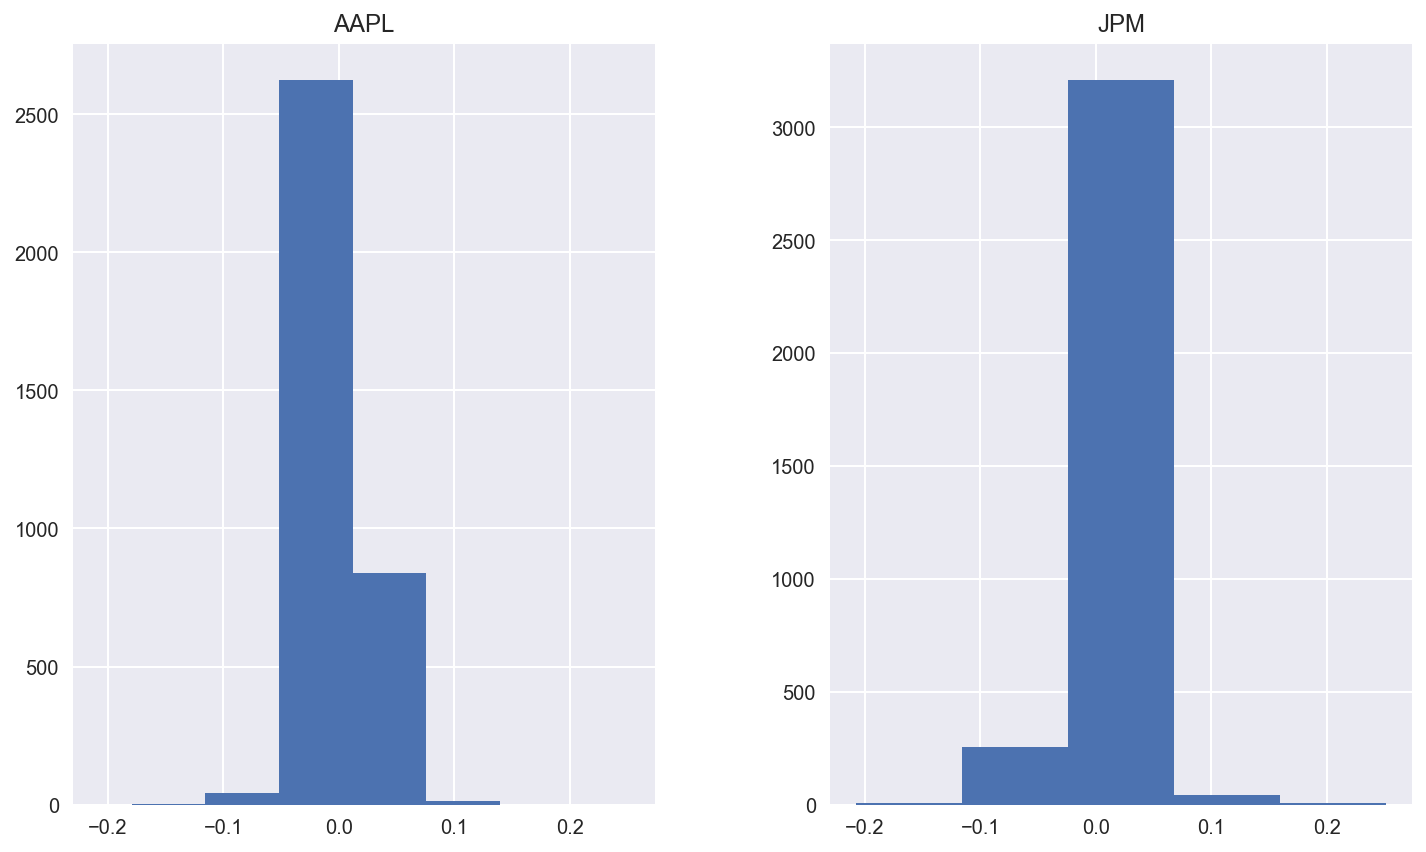

Cumulative stock returns


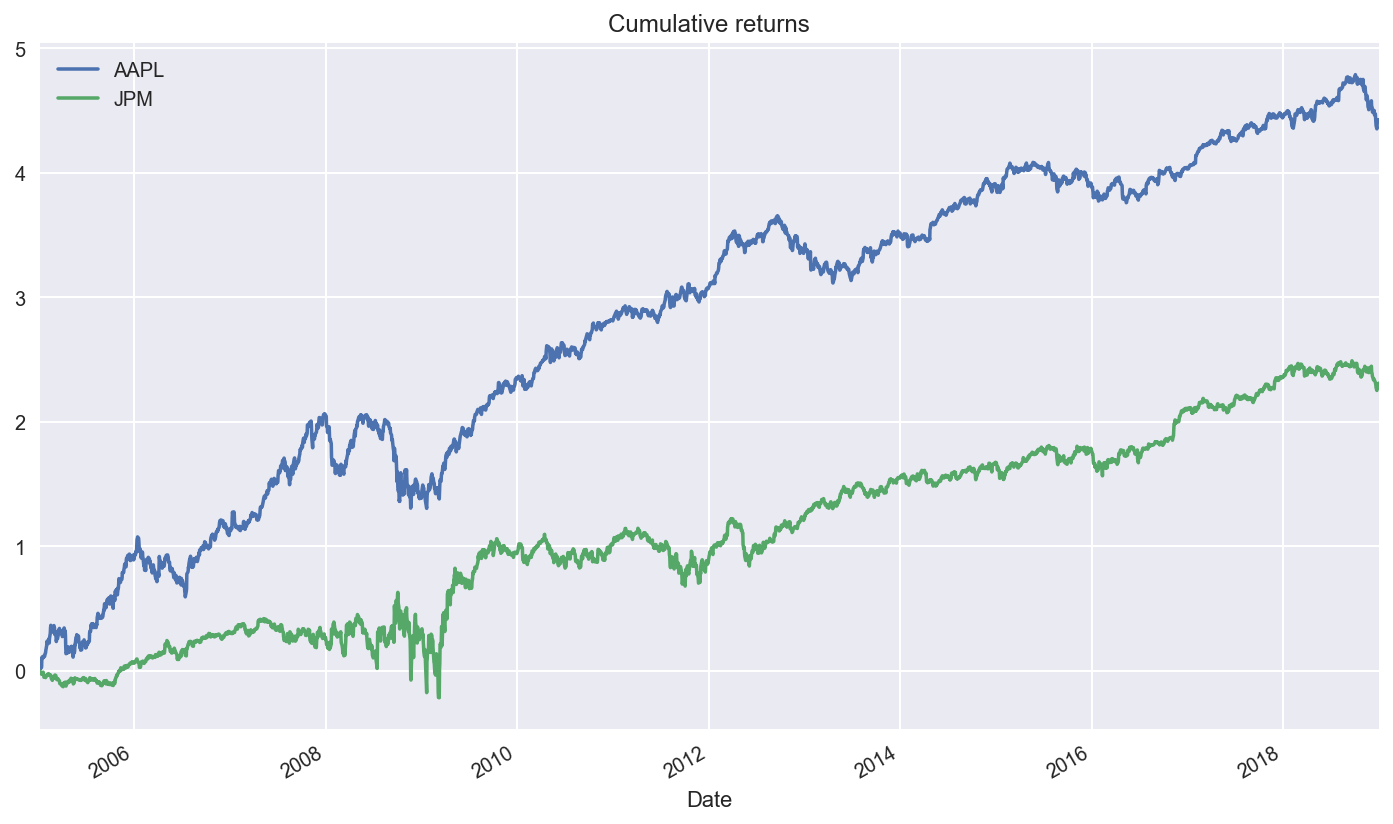

Moving averages


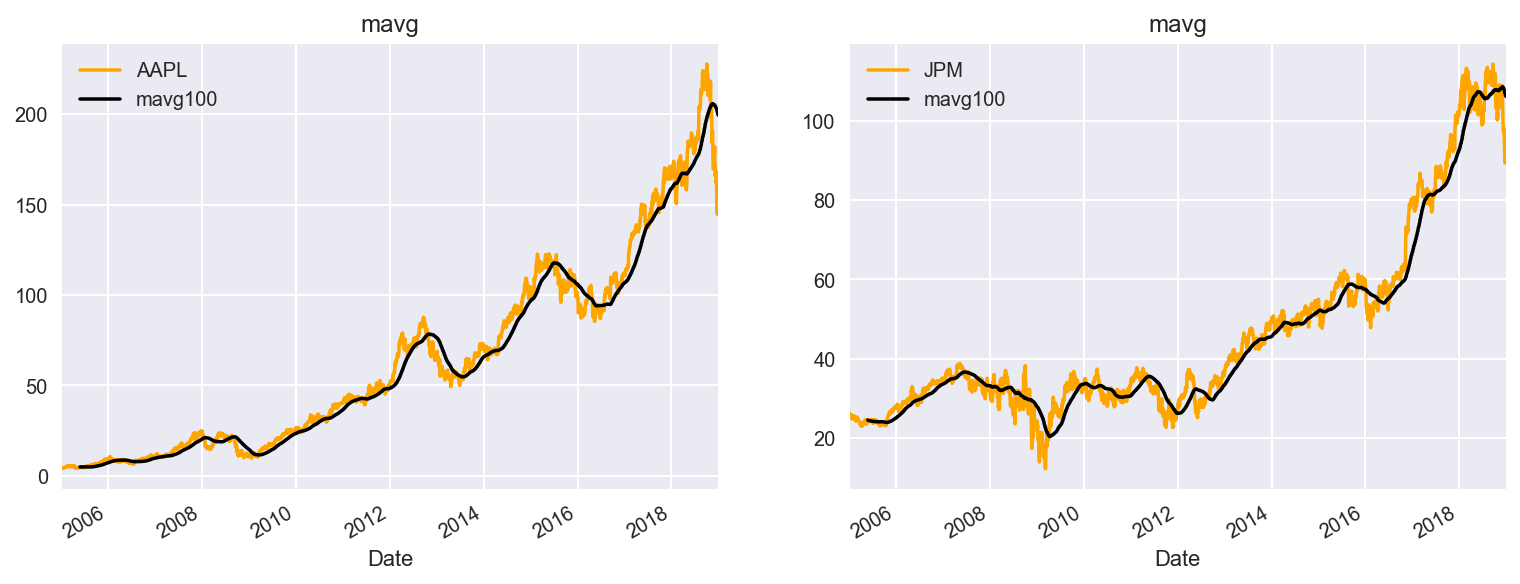

Risk versus returns of the stocks:


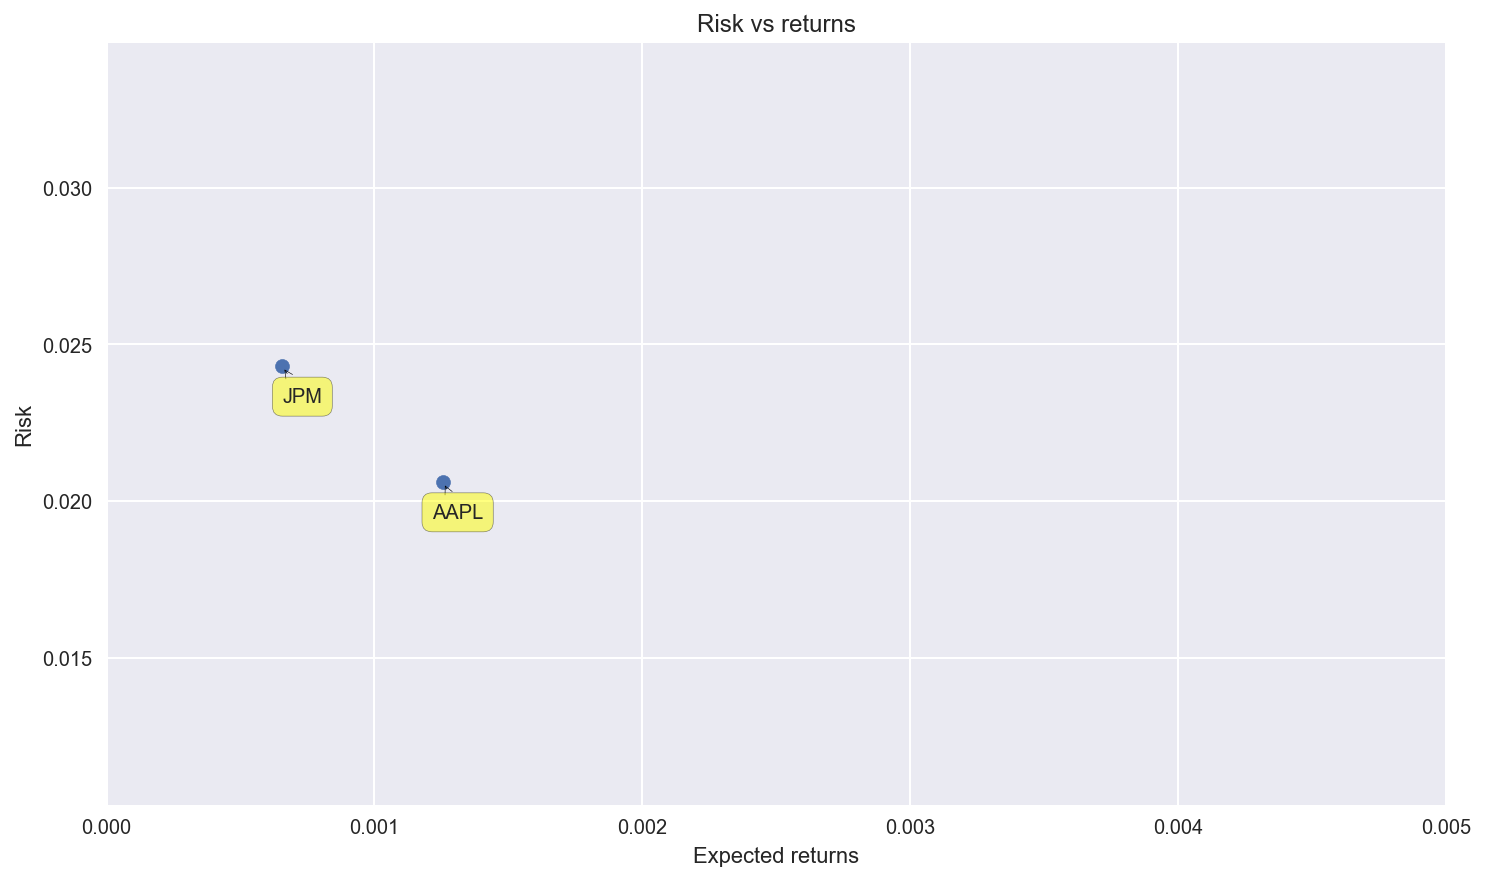

Stock volatility


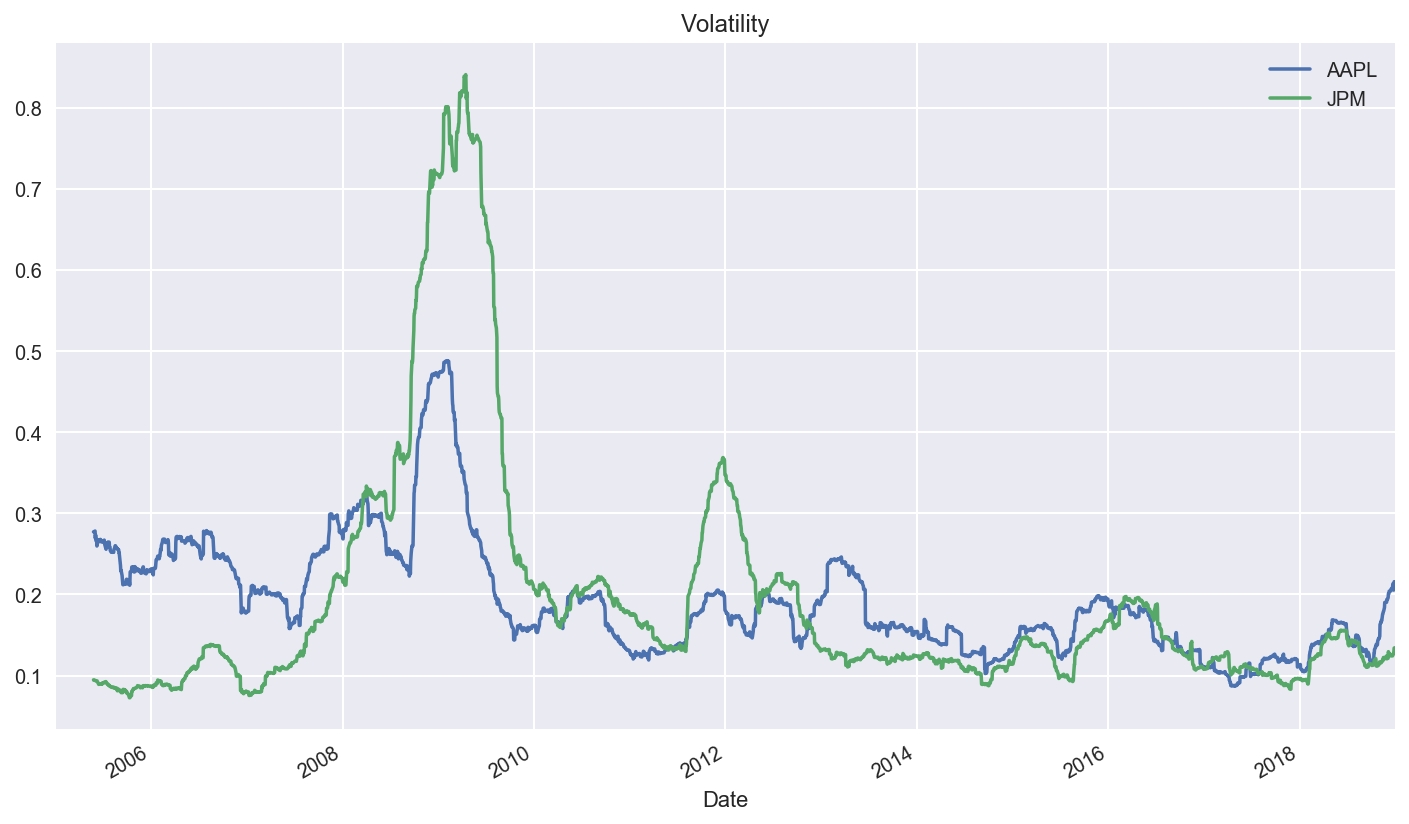

Value at risk and Expected shortfall
VaR for AAPL is: -3.0 %
CVaR for AAPL is: -4.64 %


VaR for JPM is: -3.16 %
CVaR for JPM is: -5.46 %




In [12]:
large = ['AAPL','JPM']
large_cap = prices_stock[['AAPL','JPM']].dropna()
choose(large_cap,large)

Closing prices of AAPL are higher as compared to JPM.

The returns provided by JPM show up to be larger than that of AAPL, but with sharp rises and drops. The distribution seems kind of normal for both the stocks. 

Cumulative returns of AAPL are much higher than those of JPM. 

The mVA plot shows an always upward moving trend for AAPL, whereas, there are a few drop in JPm, but otherwise, JPM also seems to have an upward goign trend. 

Risks involved with JPM is much larger than with AAPL, but AAPL offers greater returns with a lower risk than JPM. 

AAPL is a much mroe volatile stock as compared to JPM. 

The VaR and Expected shortfall are both lower for AAPL as compared to JPM. 

### Choose medium cap stock

Closing prices:


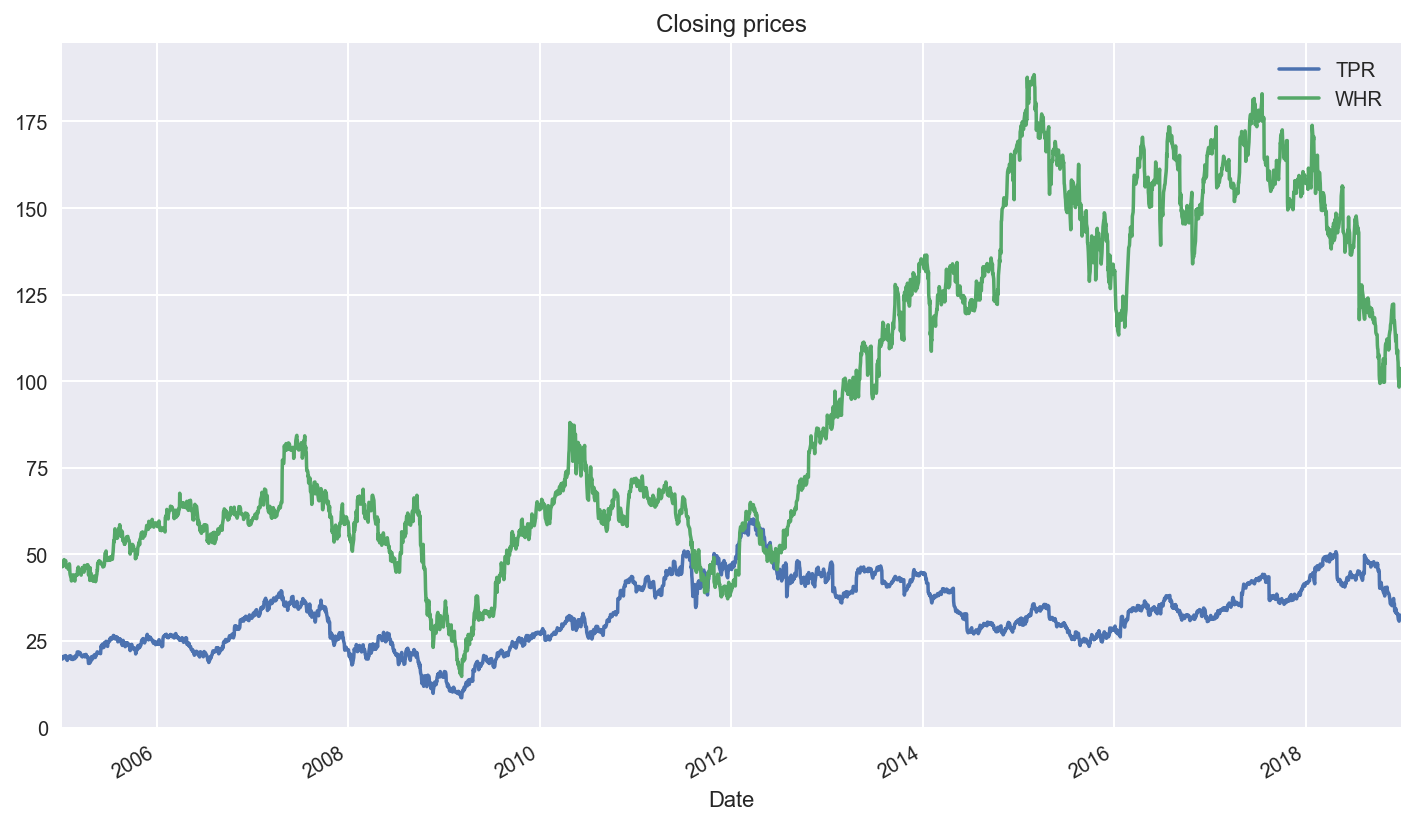

Stock returns
Returns distribution


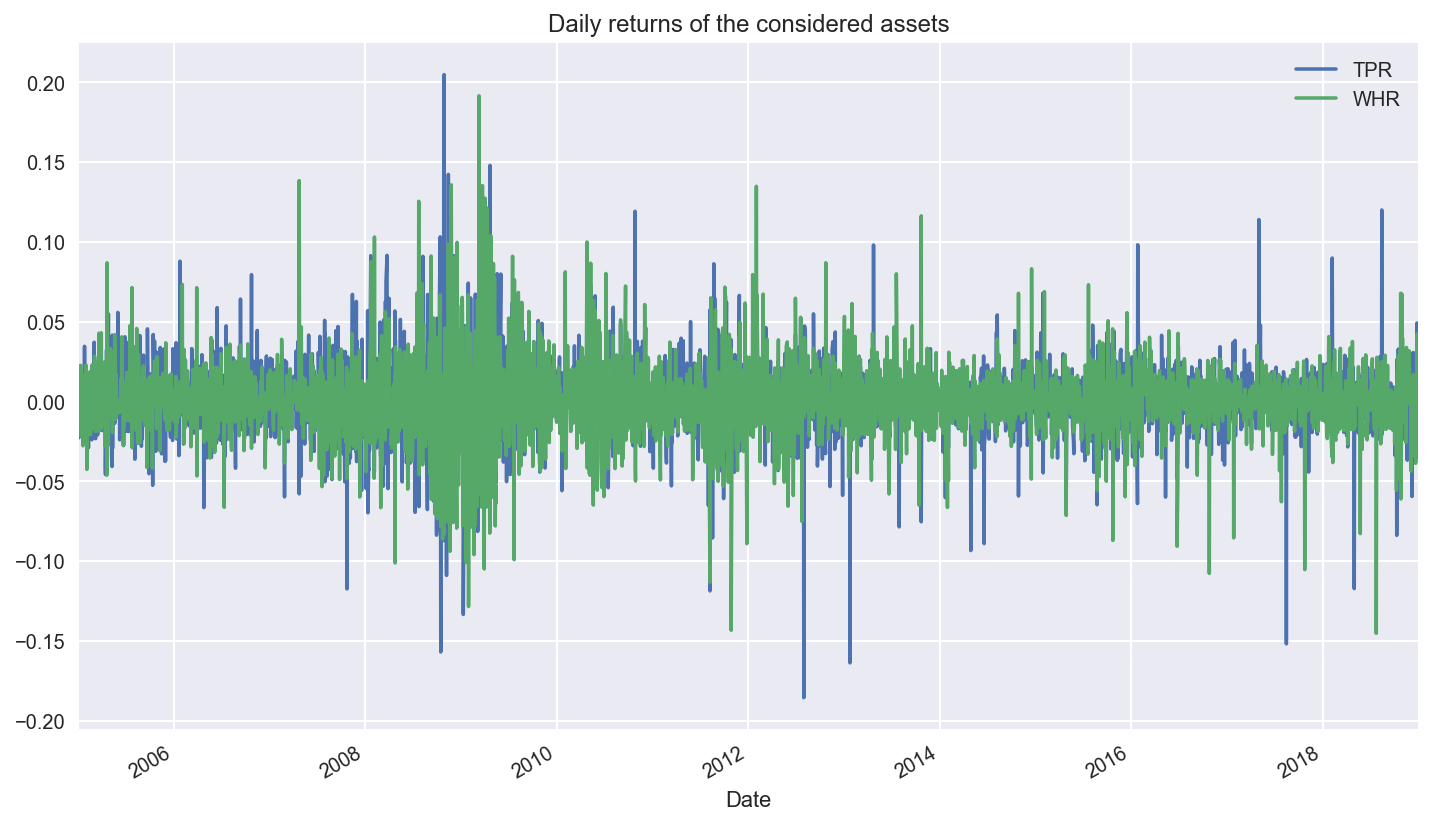

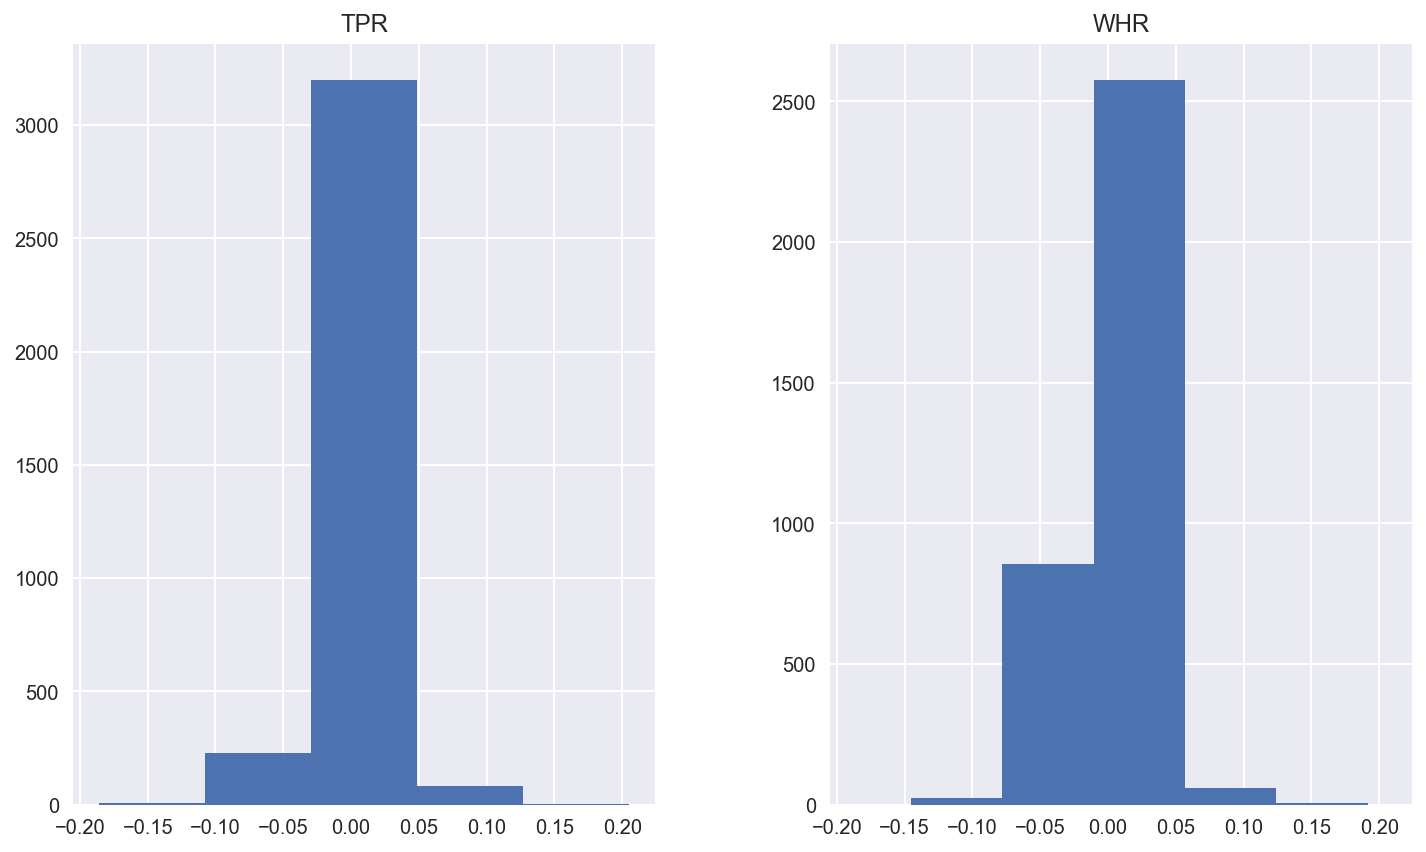

Cumulative stock returns


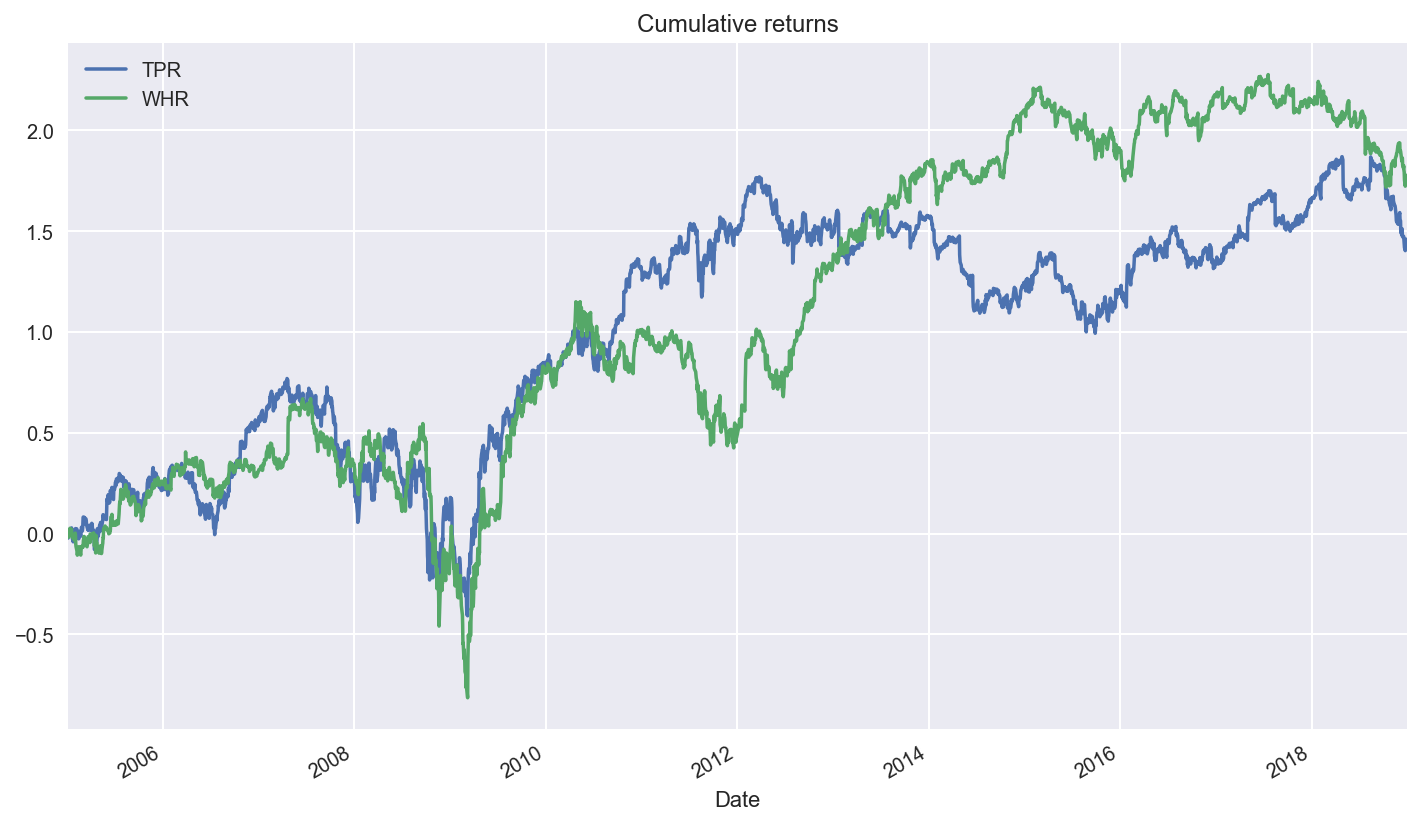

Moving averages


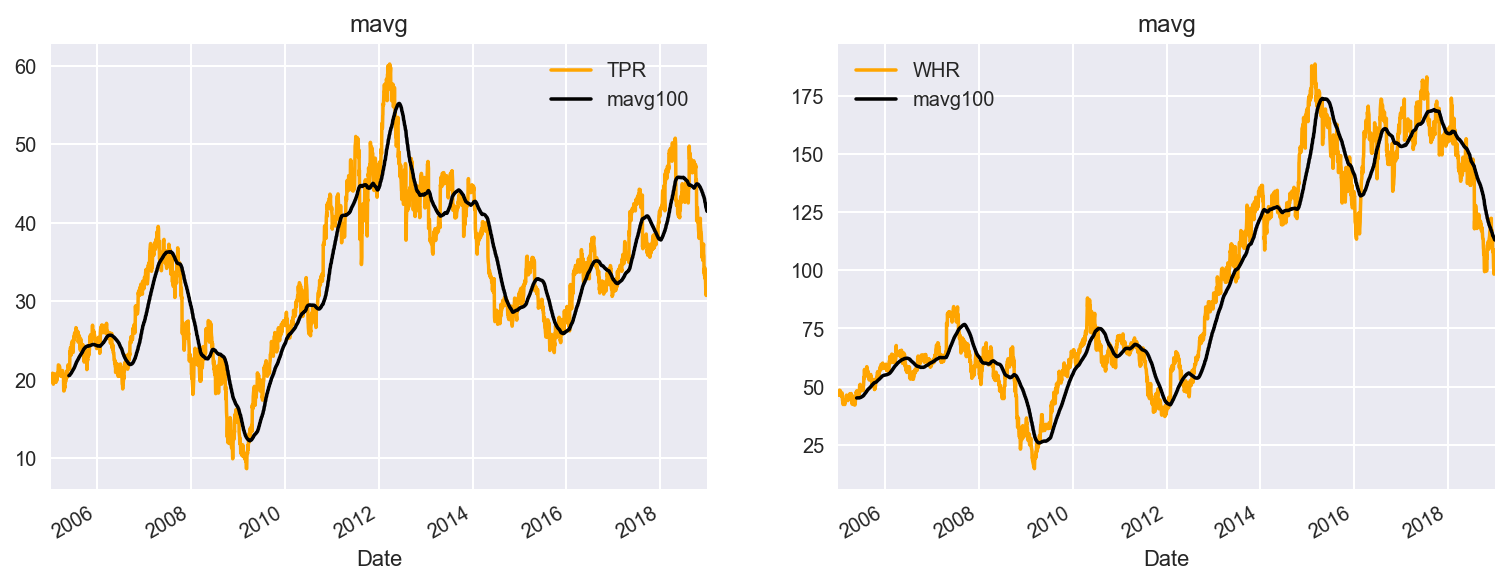

Risk versus returns of the stocks:


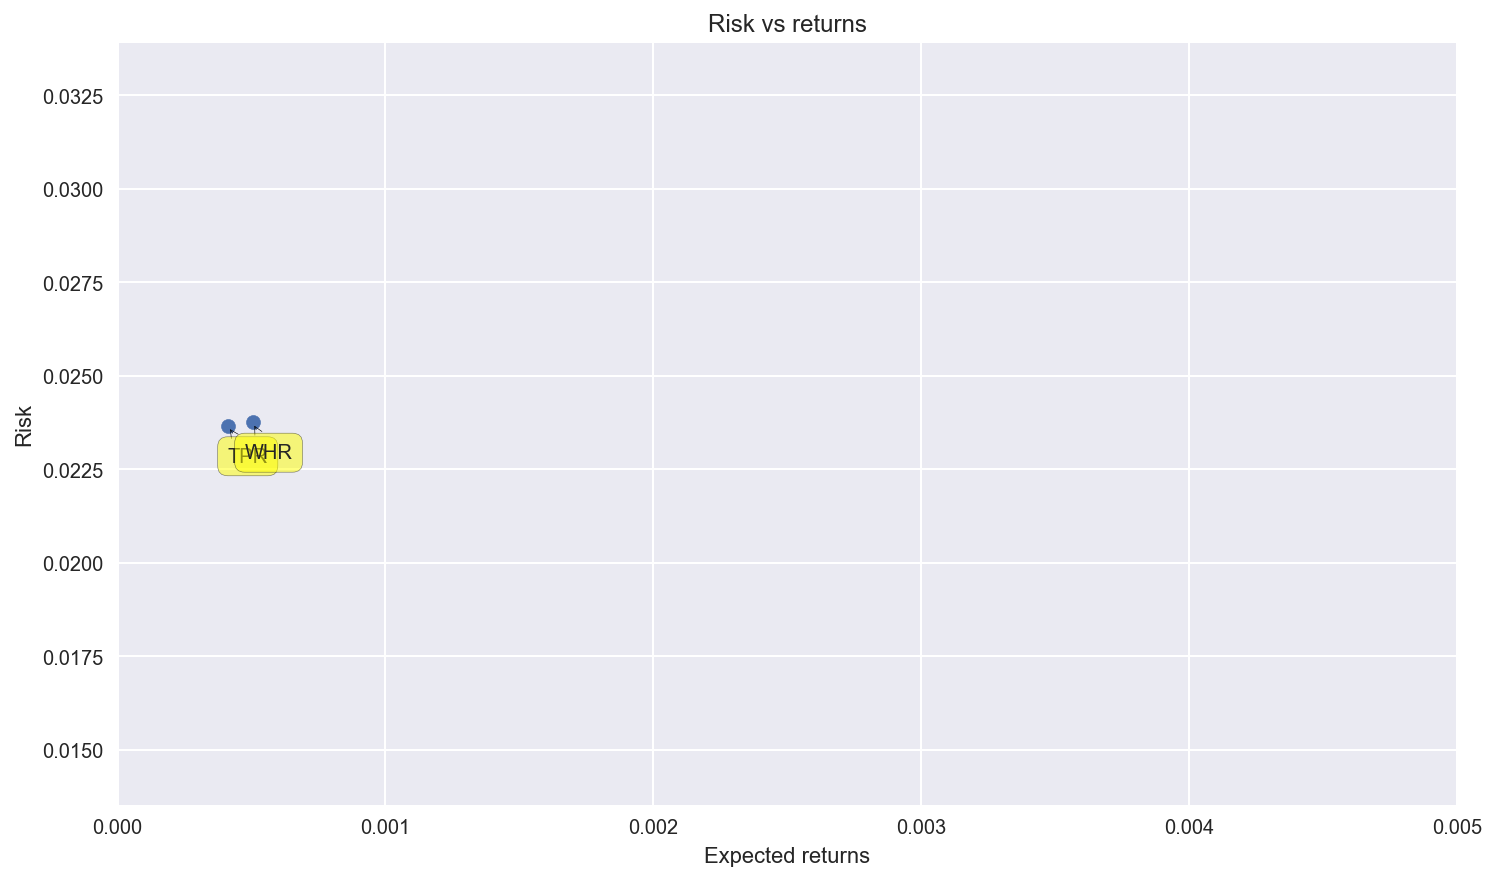

Stock volatility


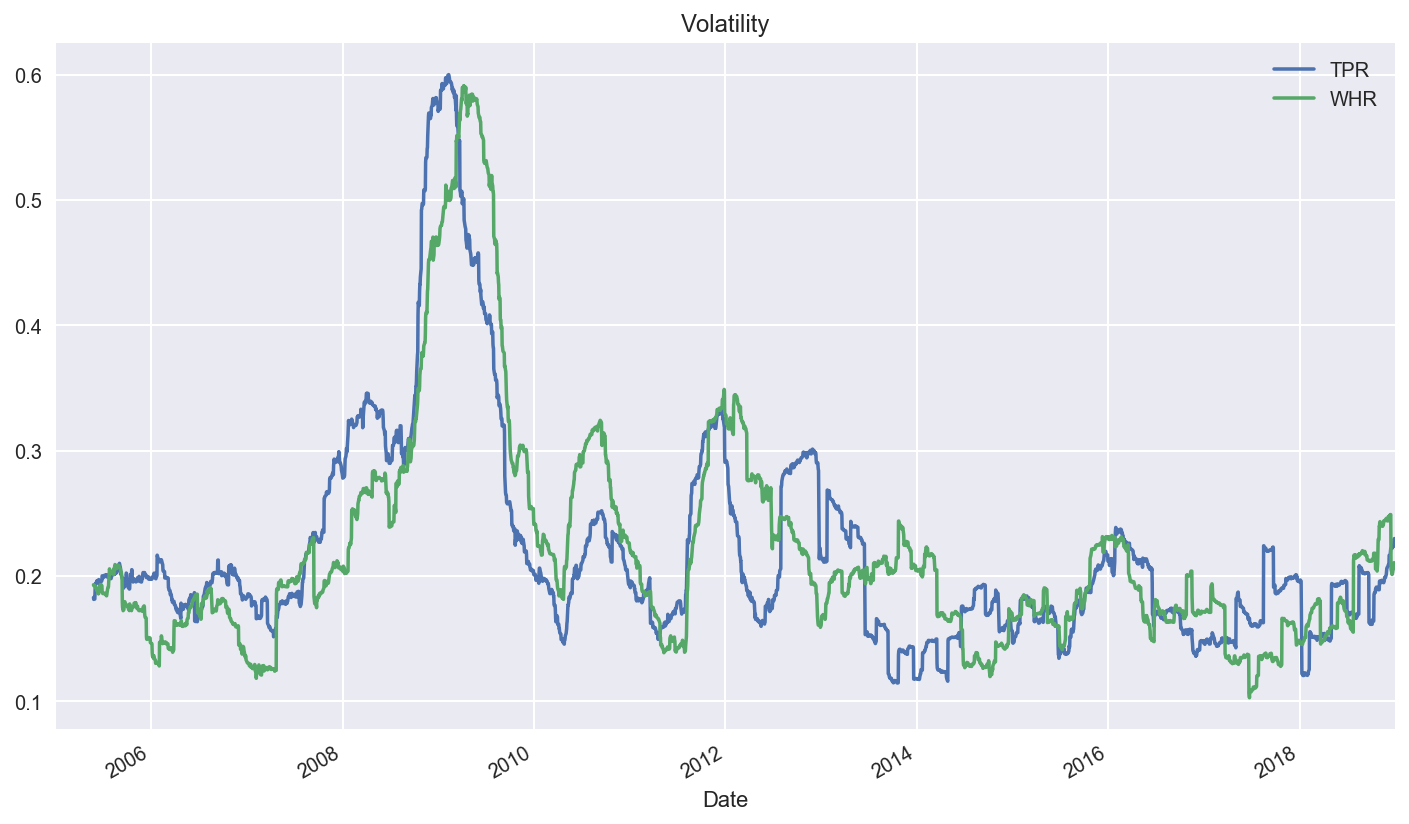

Value at risk and Expected shortfall
VaR for TPR is: -3.41 %
CVaR for TPR is: -5.39 %


VaR for WHR is: -3.55 %
CVaR for WHR is: -5.57 %




In [13]:
medium = ['TPR','WHR']
med_cap = prices_stock[['TPR','WHR']].dropna()
choose(med_cap, medium)

Closing prices of TPR are higher as compared to WHR.

The returns provided by both stocks seem to be almost similar, but with sharp rises and drops. The distribution seems kind of normal for both the stocks. 

Cumulative returns ofboth stocks start at the same and then, cross over with finally WHR having higher returns than TPR. 

The mVA plot shows a neutral trend for both stocks. They seem to perform well and also incur losses on the way. 

Risks involved with both the stocks is almost the same.

The volatility of both the stocks also turns out to be quite similar. Both were very volatitle around 2010 and then seemed to become less volatile with the passing years.

The VaR and Expected shortfall are both lower for TPR as compared to WHR, but by very few numbers. 

### Choose low cap stock

Closing prices:


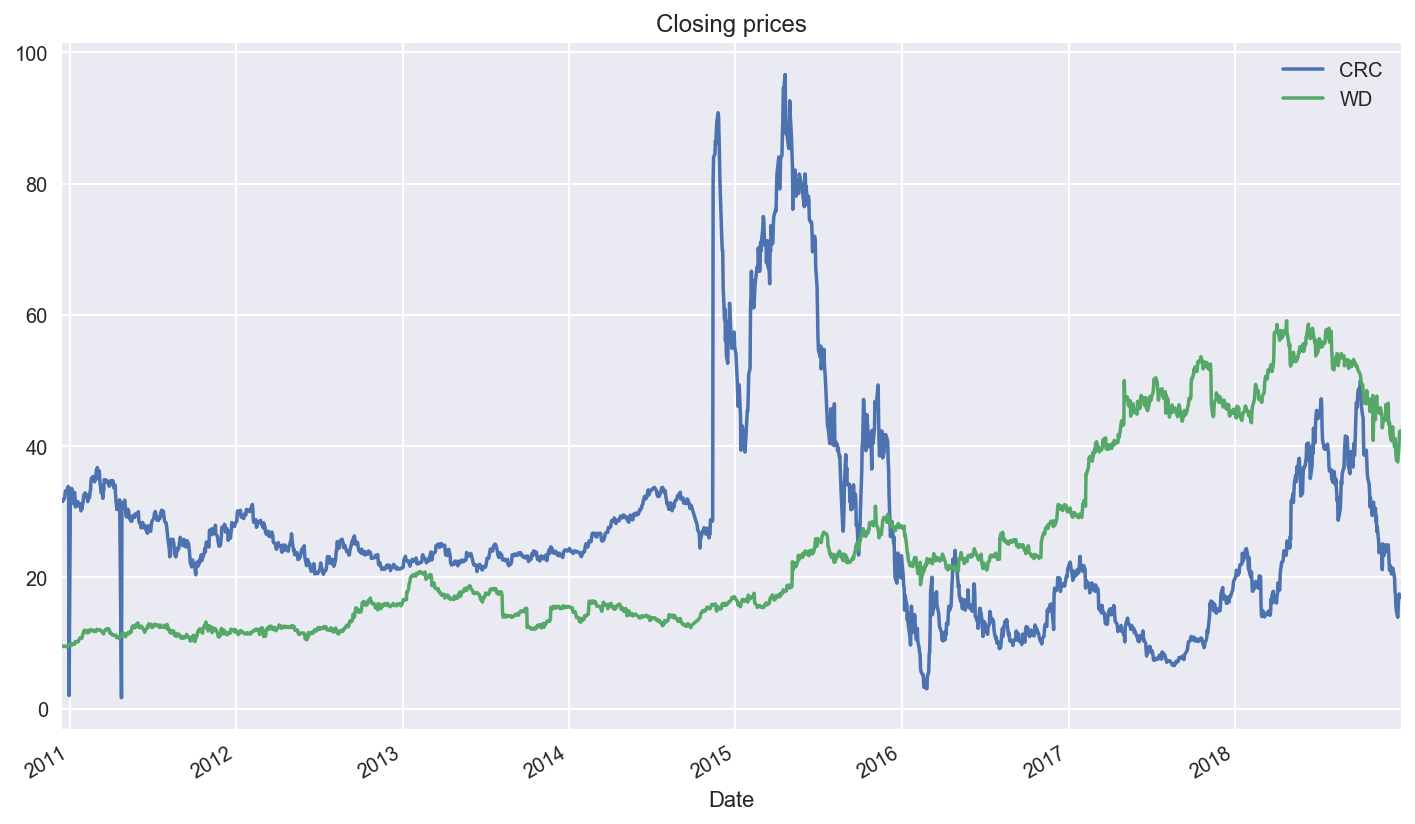

Stock returns
Returns distribution


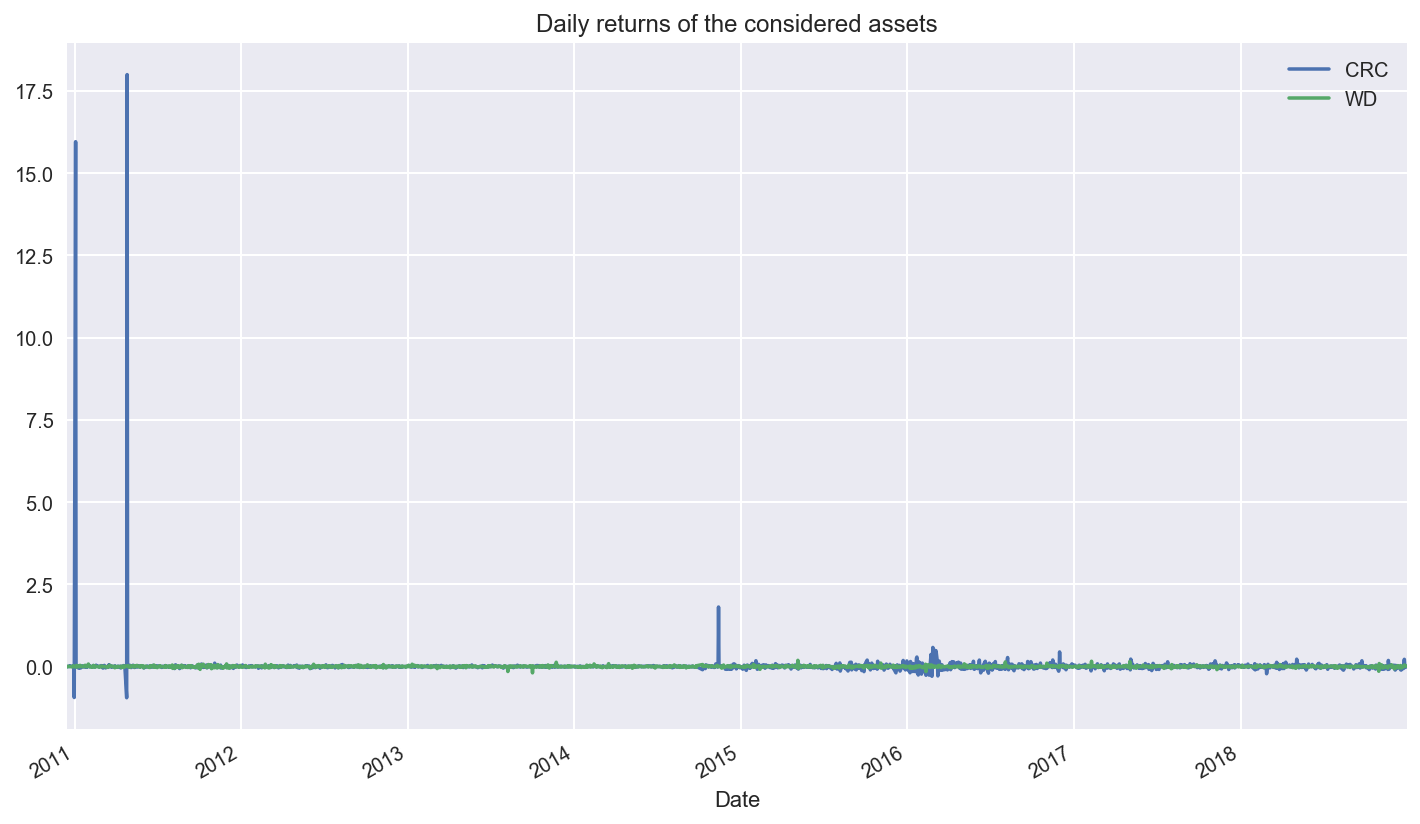

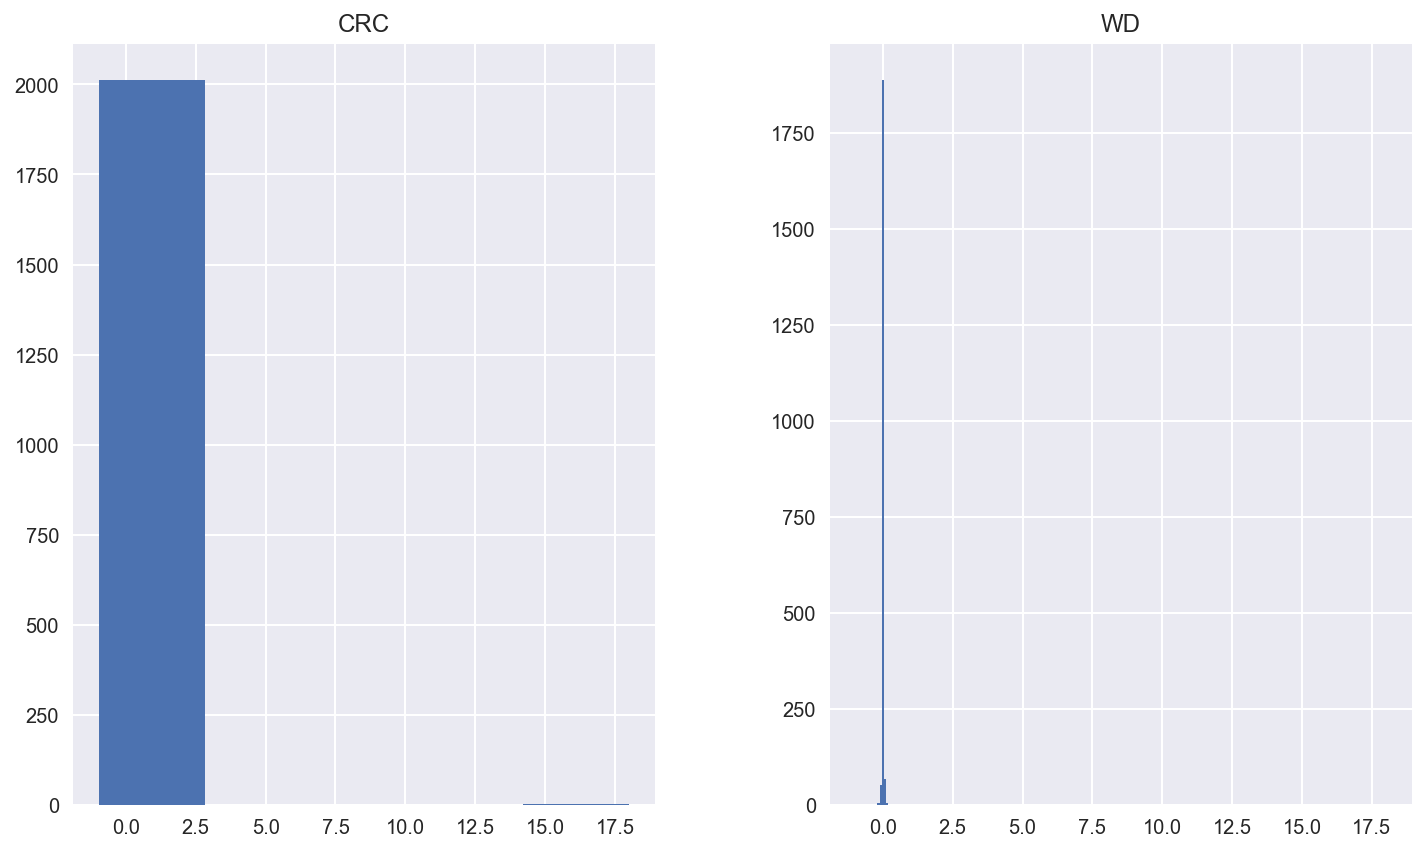

Cumulative stock returns


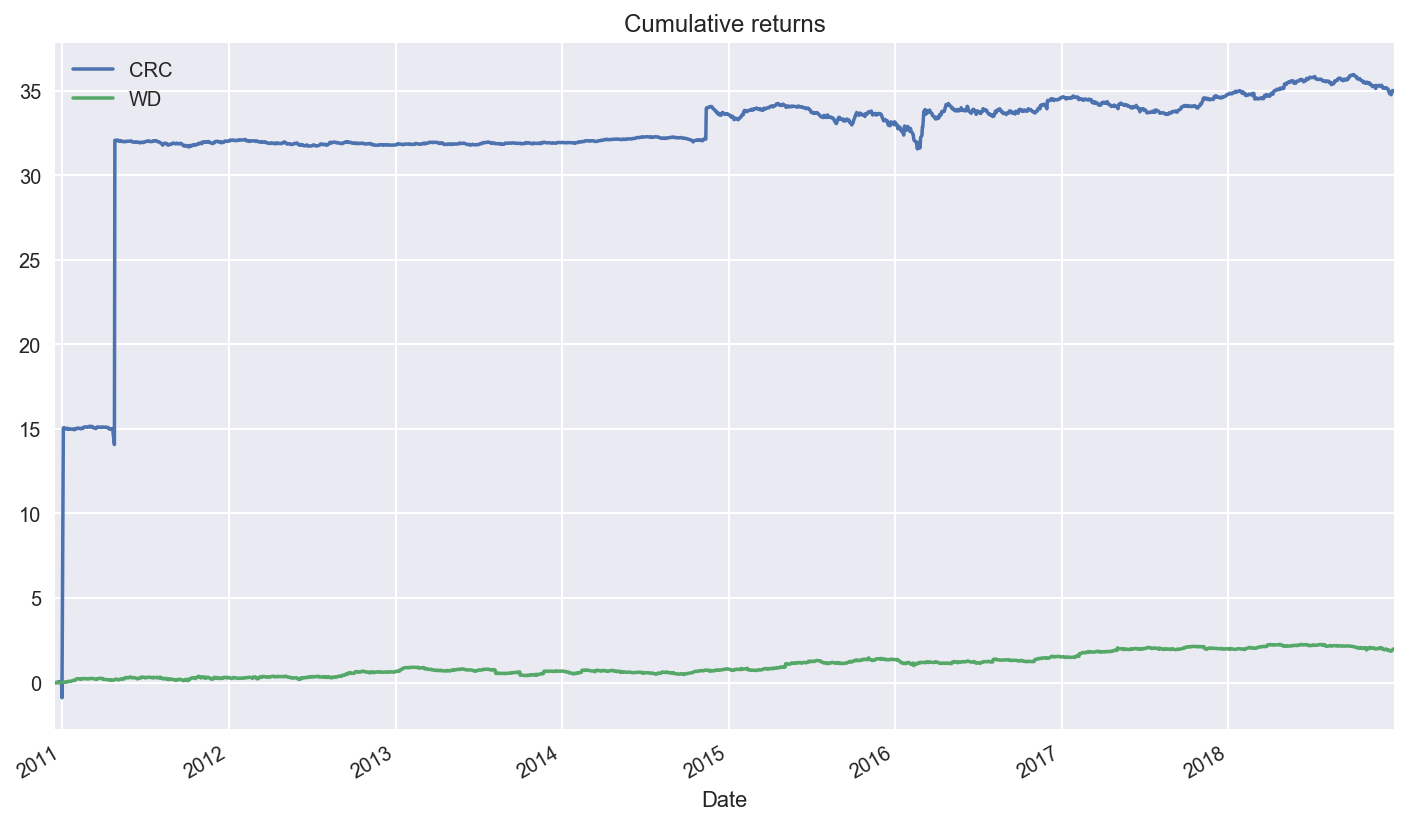

Moving averages


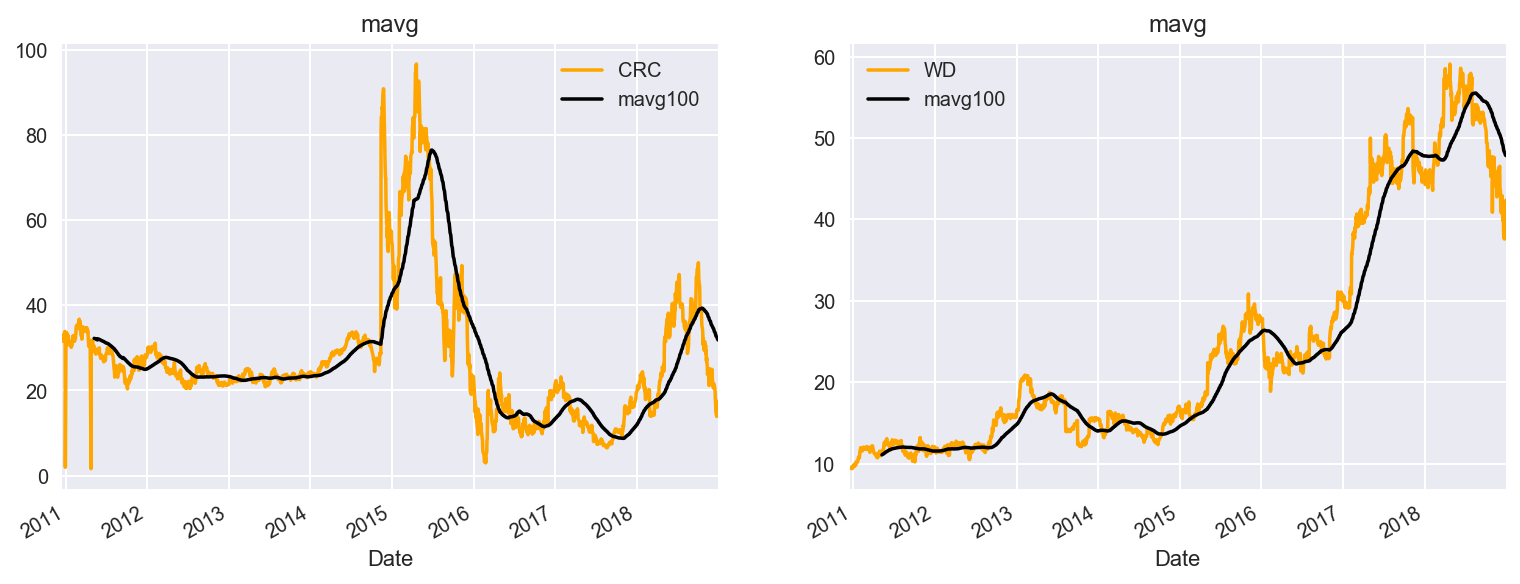

Risk versus returns of the stocks:


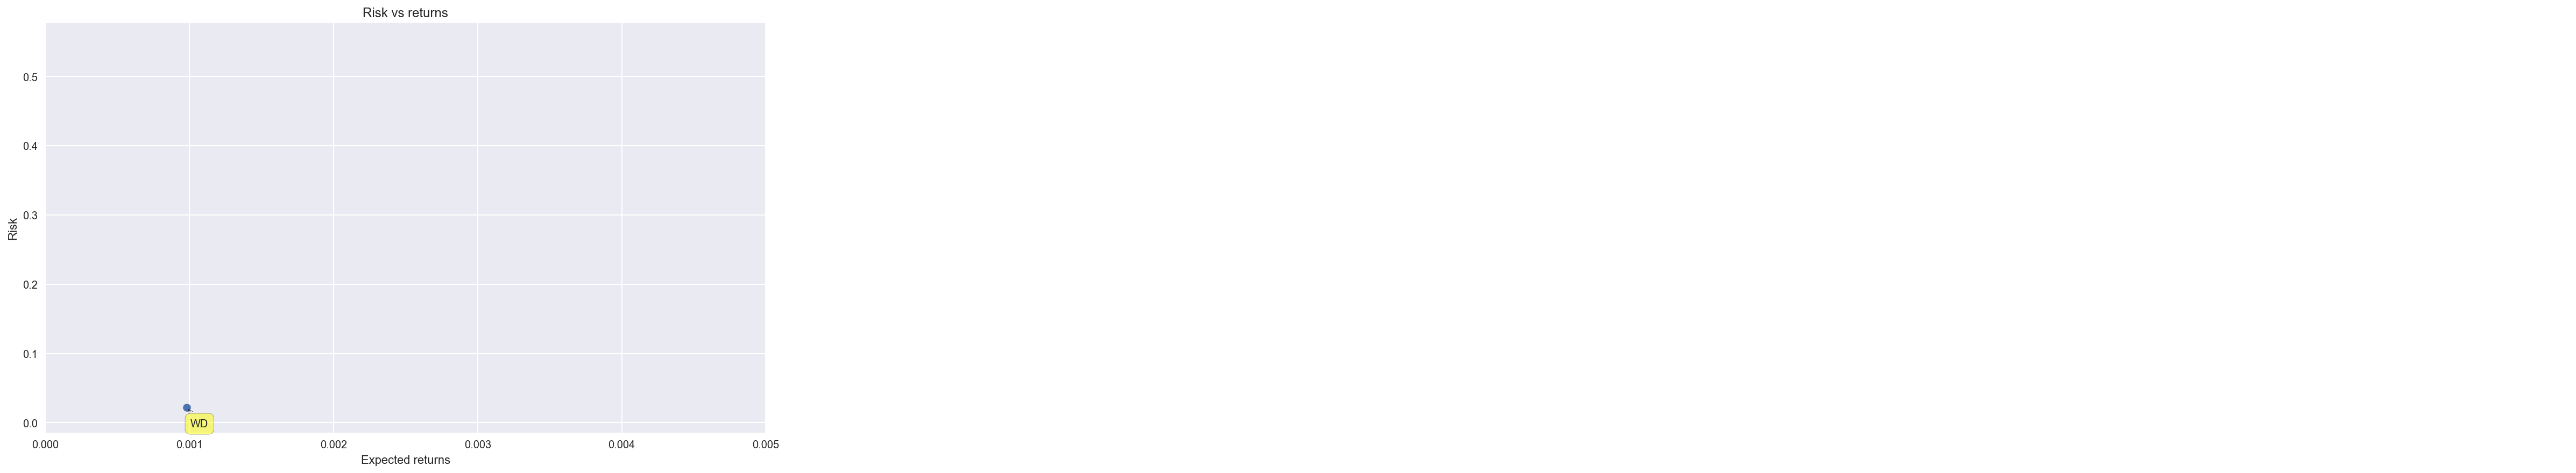

Stock volatility


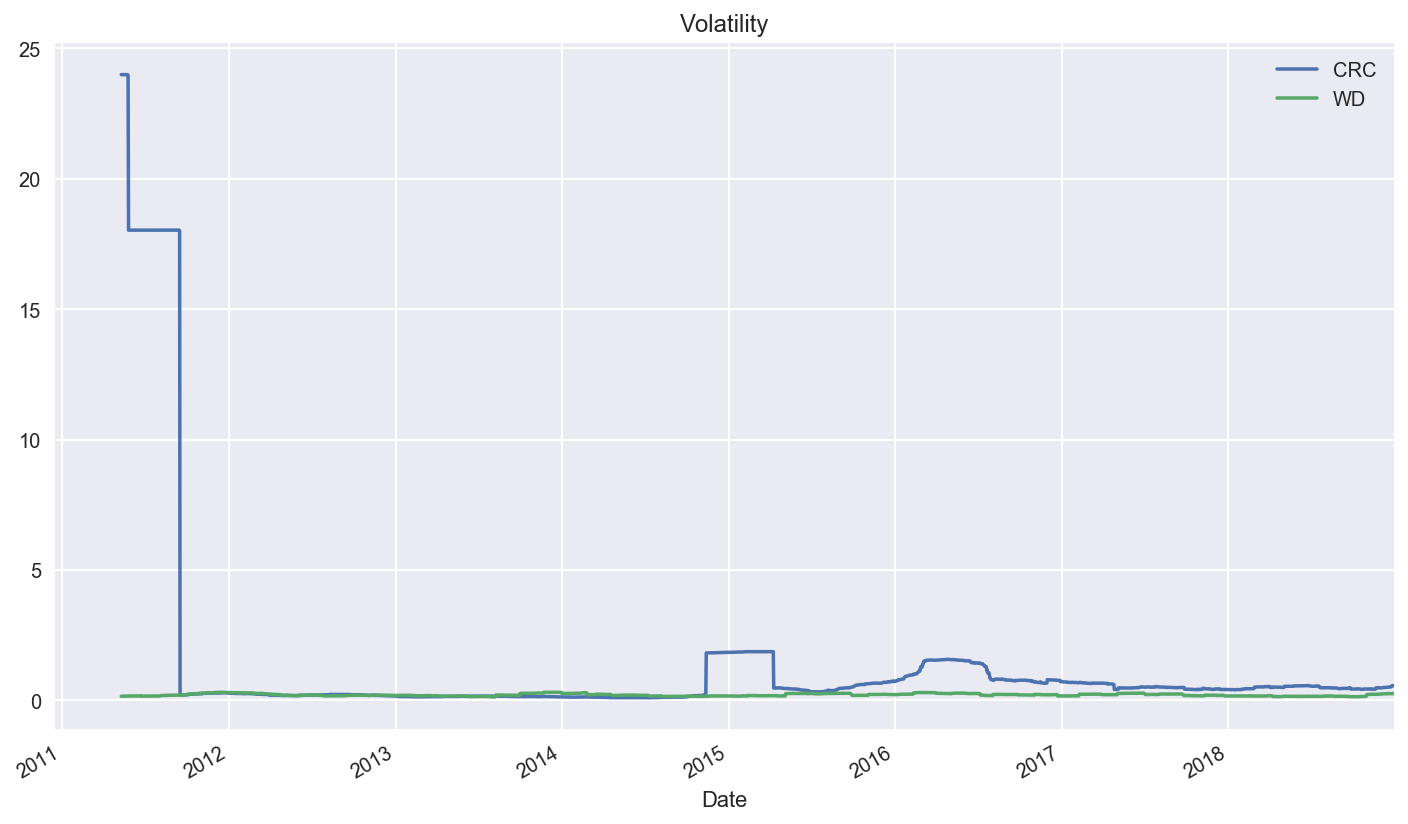

Value at risk and Expected shortfall
VaR for CRC is: -7.57 %
CVaR for CRC is: -13.15 %


VaR for WD is: -2.94 %
CVaR for WD is: -4.75 %




In [14]:
low = ['CRC','WD']
low_cap = prices_stock[['CRC','WD']].dropna()
choose(low_cap, low)

Closing prices of CRC are higher as compared to WD, very much higher.

CRC seems to have very high returns initially in the years of 2011, twice and then again falls down to near zero. The returns for WD are always near zero. The distribution isn't normal for either of the stocks. Both are skewed! WD has almost all the return values close to zero, whereas for CRC, it is the range of negative to upto 2.5.

Cumulative returns of CRC are much higher than those of WD. 

The mVA plot shows a normal trend for CRC with a sharp rise and drop in the year of 2015. WD has an upward moving trend throughout. 

Risks involved with WD is very low. CRC cannot be plotted on the graph, which shows the returns involved is very high, higher than 0.005. Hence, CRC seems to be a much better investment option.

CRC was initially in thear years before 2012, highly volatile, but then it stabilised. WD is also not that volatile. It also seems to be very much stable throughout.  

The VaR and Expected shortfall are both lower for WD as compared to CRC. 

But since these are both low cap stocks and the person for whom this portfolio is being built is tolerant to risks, CRC is a much better option because the returns involved would be very high if they are positive, as compared to WD.

Hence, invest in CRC!

### Choose emerging cap stock

Closing prices:


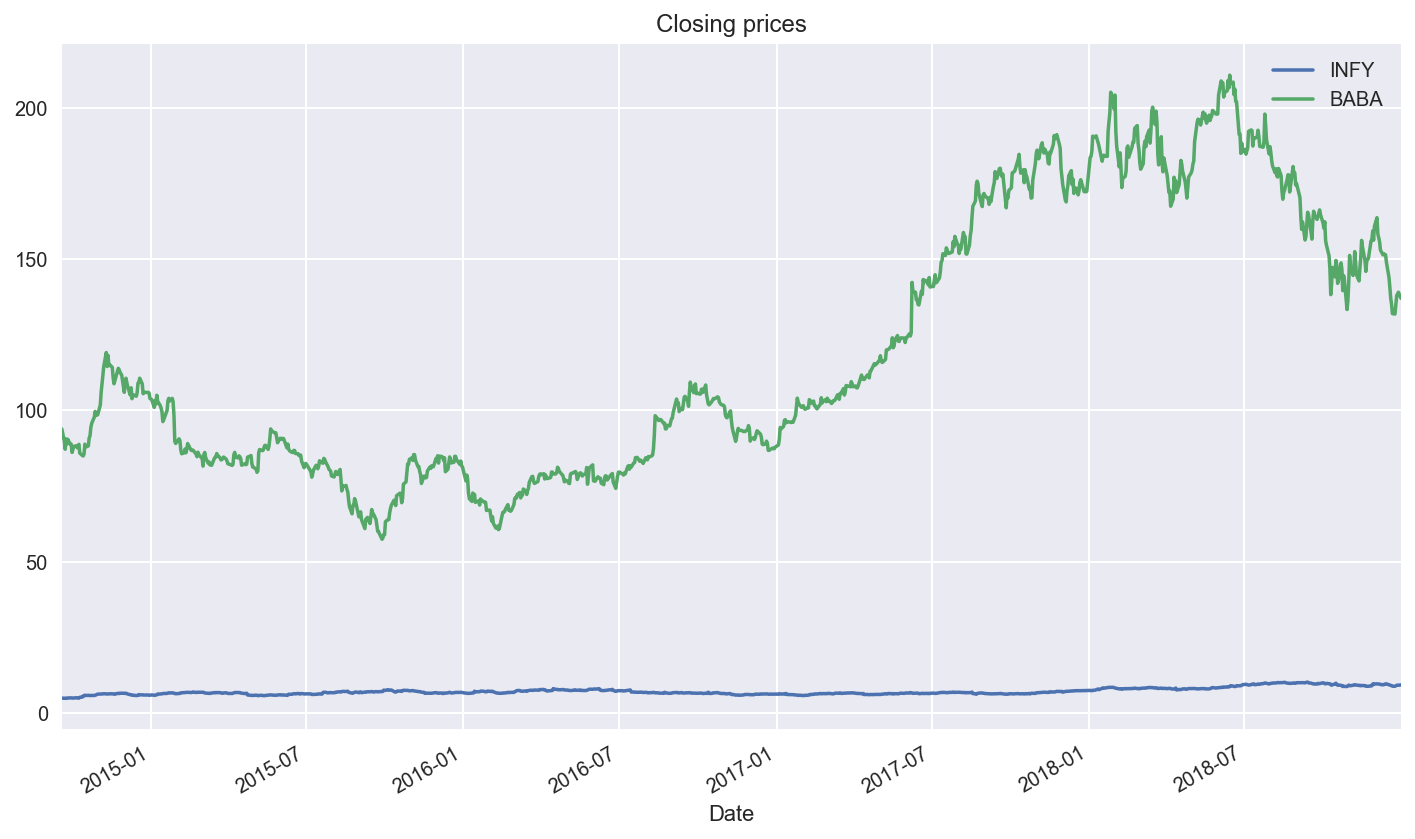

Stock returns
Returns distribution


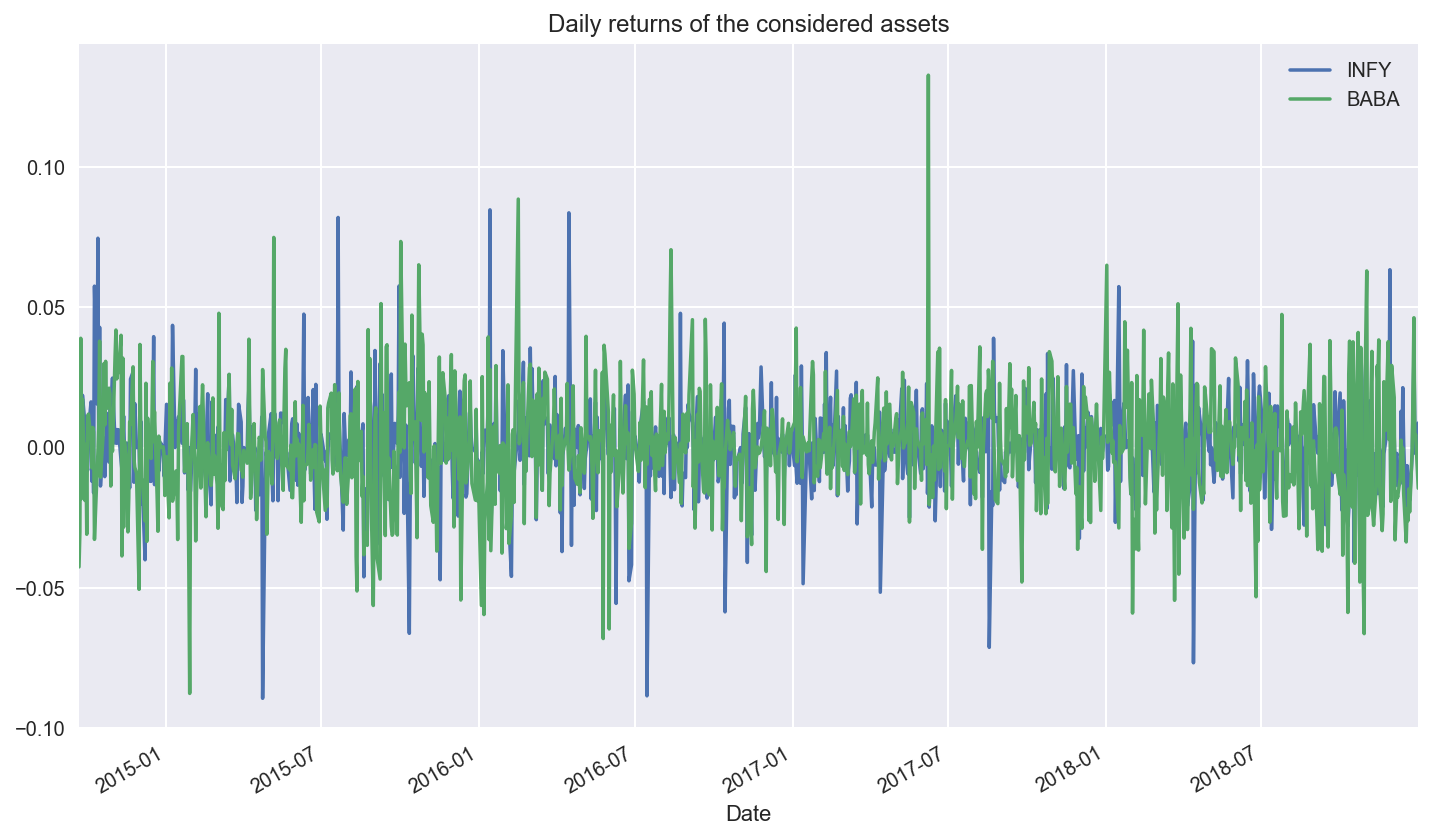

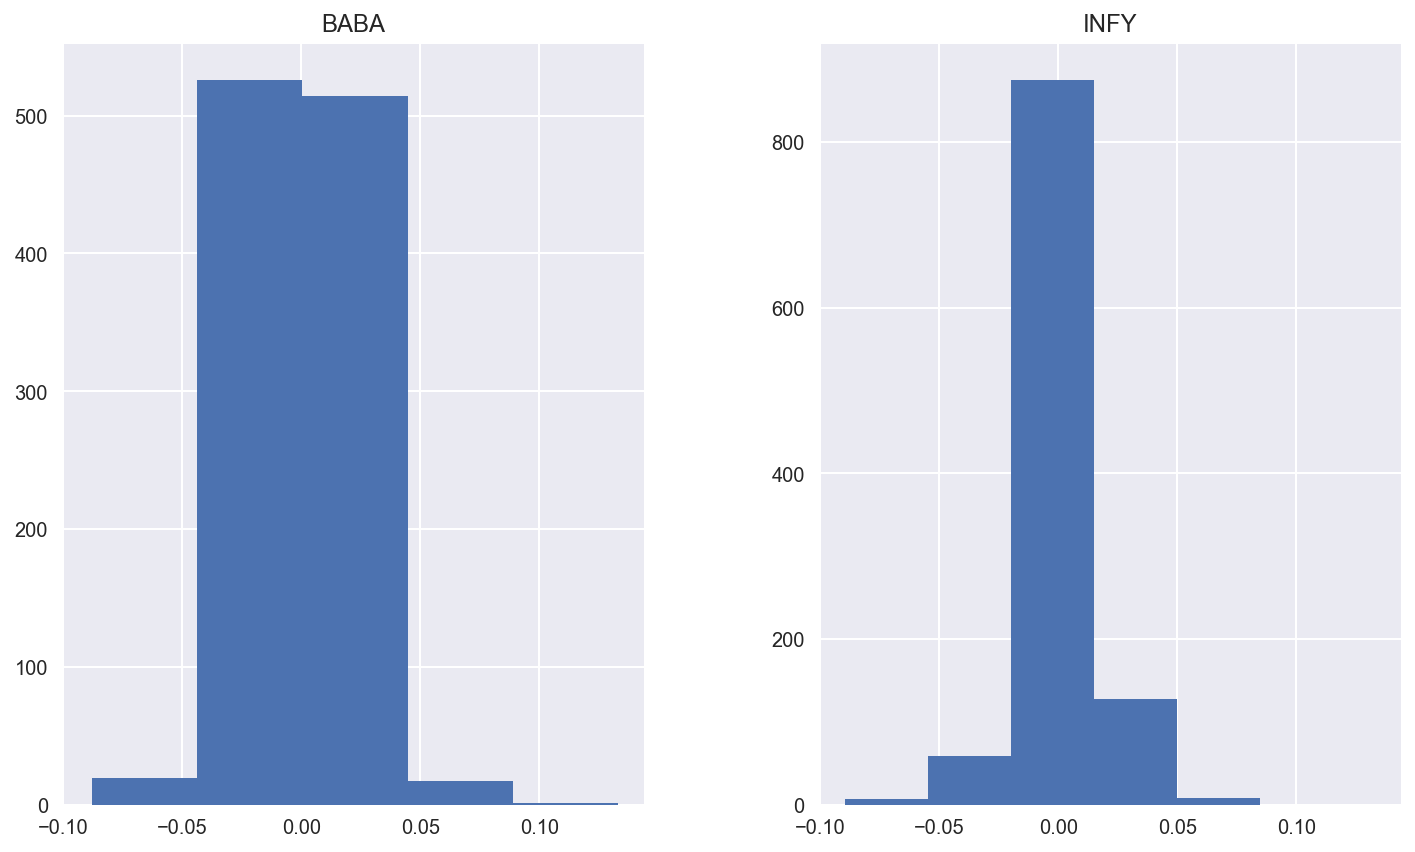

Cumulative stock returns


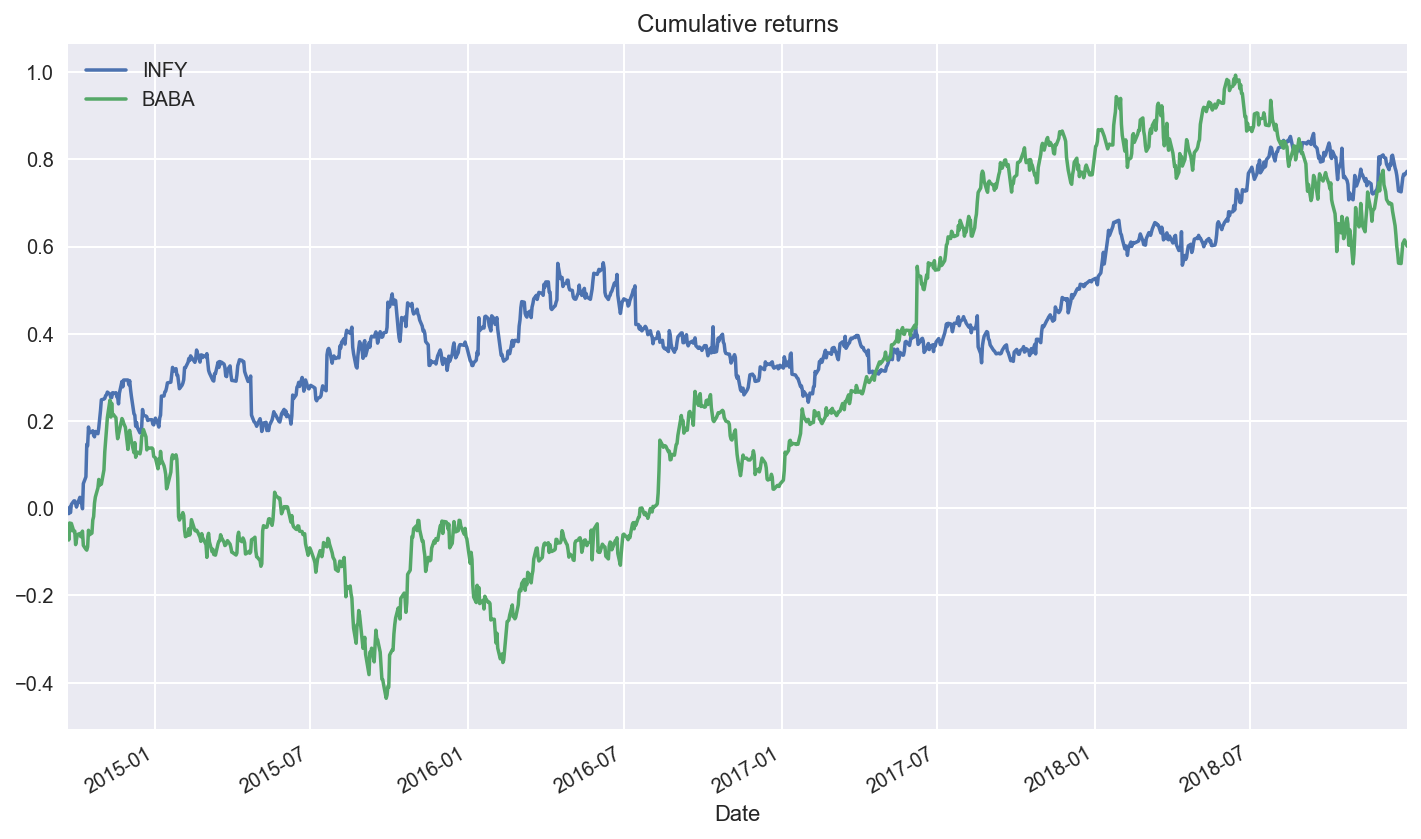

Moving averages


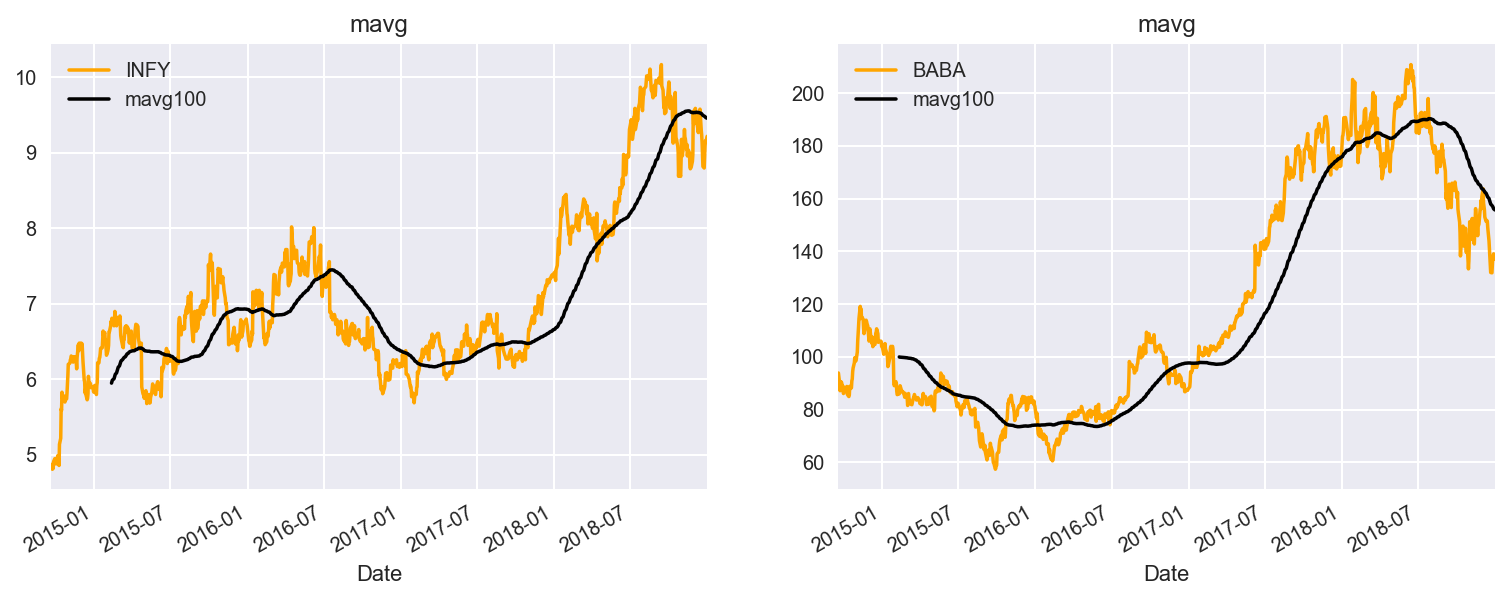

Risk versus returns of the stocks:


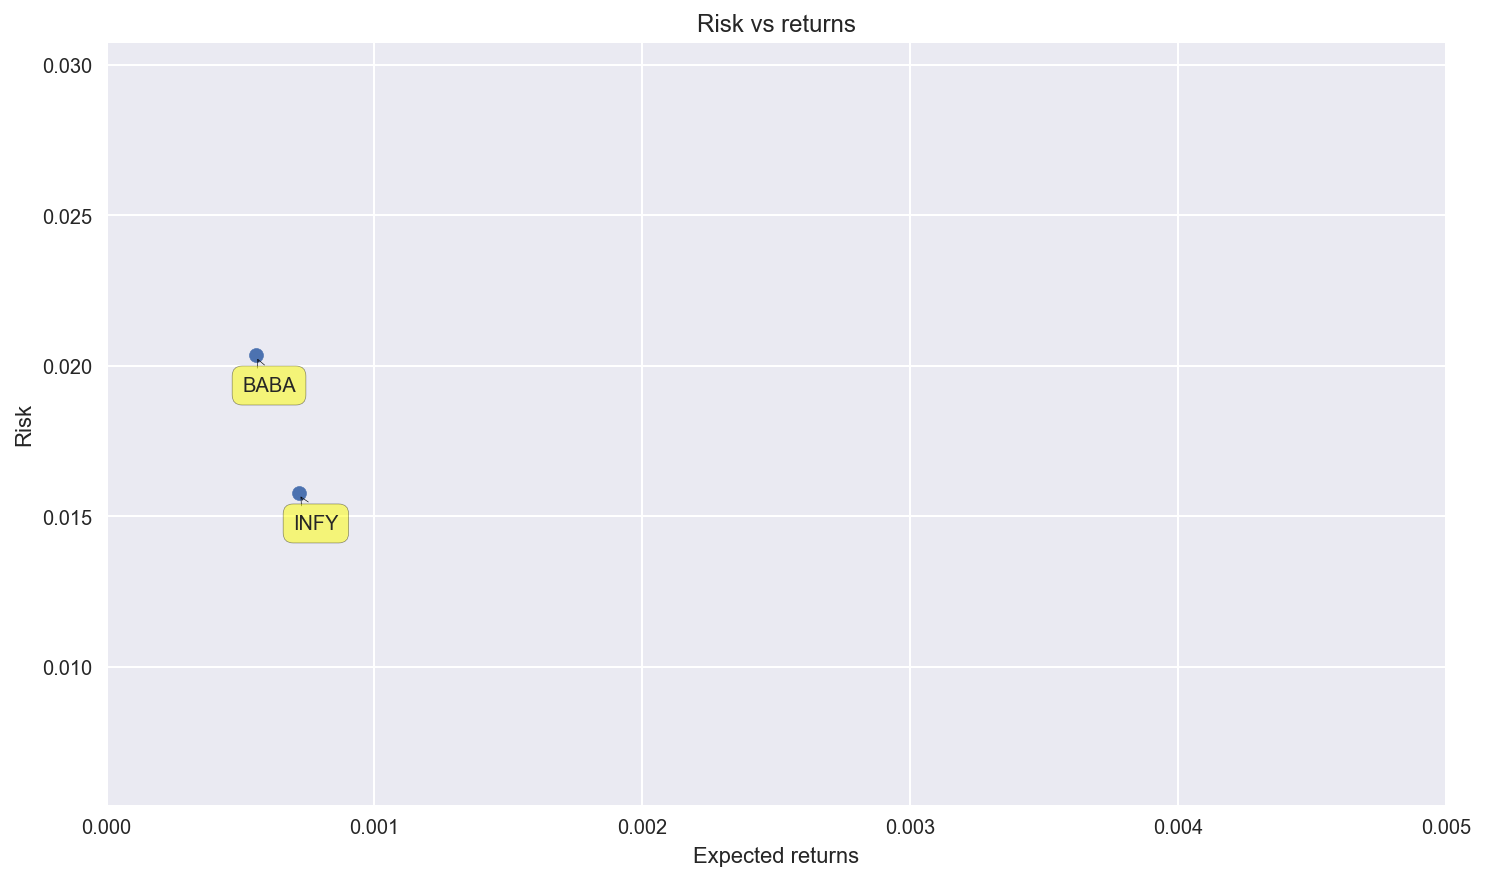

Stock volatility


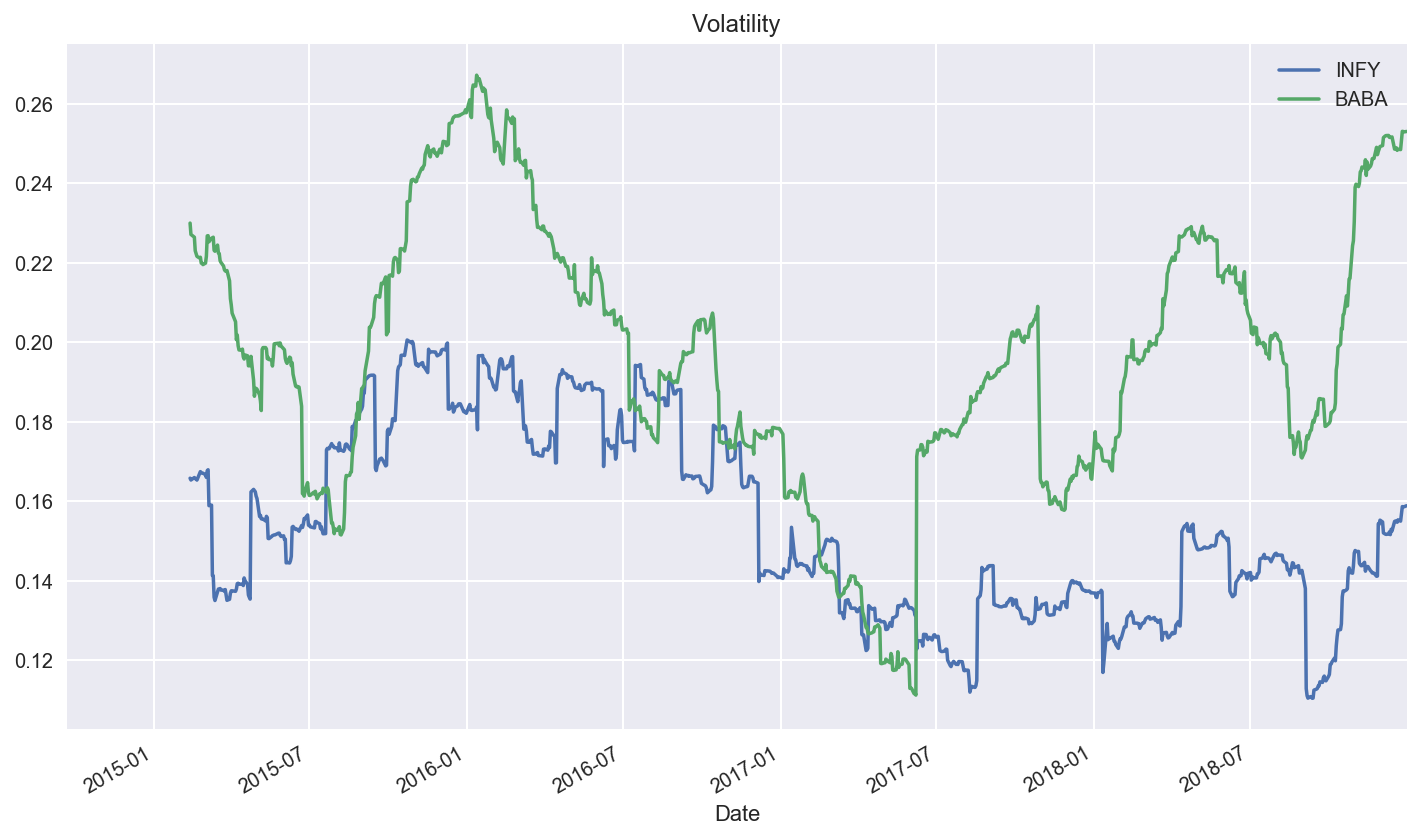

Value at risk and Expected shortfall
VaR for INFY is: -2.13 %
CVaR for INFY is: -3.62 %


VaR for BABA is: -3.13 %
CVaR for BABA is: -4.3 %




In [15]:
emerge = ['INFY','BABA']
emerging = prices_stock[['INFY','BABA']].dropna()
choose(emerging, emerge)

Closing prices of INFY are higher as compared to BABA.

The returns of both stocks seem to be quite similar, but with sharp rises and drops more in the case of BABA than in INFY. The distribution seems kind of normal for both the stocks. 

Cumulative returns of BABA were lower in the beginning, during 2015, but then it became much higher than INFY. 

The mVA plot shows an always upward moving trend for both the stocks. 

Risks involved with BABA is much larger than with INFY,but since the person is an aggregate to moderate risk taker and these are both emerging stocks, it doesn't matter if we invest in BABA, which has a higher risk.

BABA is more volatile than INFY, but since the value is below 0.3, it is fine! 

The VaR and Expected shortfall are both lower for INFY as compared to BABA. 

Invest in BABA

## Invest in stock

Large cap: AAPL

Med cap: TPR

Low cap: CRC

Emerging cap: BABA

## Create portfolio for individual stocks

In [2]:
# Building a portfolio of individual stocks
#Let's build a new dataset
tickers = ['AAPL','TPR','CRC','BABA']

start_date = '2015-12-31'
end_date = '2019-12-12'
pred_end_date = '2020-03-31'

portfolio = yf.download(tickers, start=start_date, end=end_date, adjusted=True)[['Adj Close']]
print(portfolio.head())
print(portfolio.tail())

[*********************100%***********************]  4 of 4 downloaded
           Adj Close                    
                AAPL   BABA   CRC    TPR
Date                                    
2015-12-31     98.36  81.27  23.3  28.24
2016-01-04     98.45  76.69  20.3  29.03
2016-01-05     95.98  78.63  18.6  29.31
2016-01-06     94.10  77.33  18.5  28.29
2016-01-07     90.13  72.72  15.0  28.38
           Adj Close                     
                AAPL    BABA   CRC    TPR
Date                                     
2019-12-06    270.71  201.89  7.81  25.53
2019-12-09    266.92  198.74  8.27  25.80
2019-12-10    268.48  200.45  8.40  25.53
2019-12-11    270.77  204.64  8.12  25.82
2019-12-12    271.46  204.50  8.60  26.34


Text(0, 0.5, 'Price')

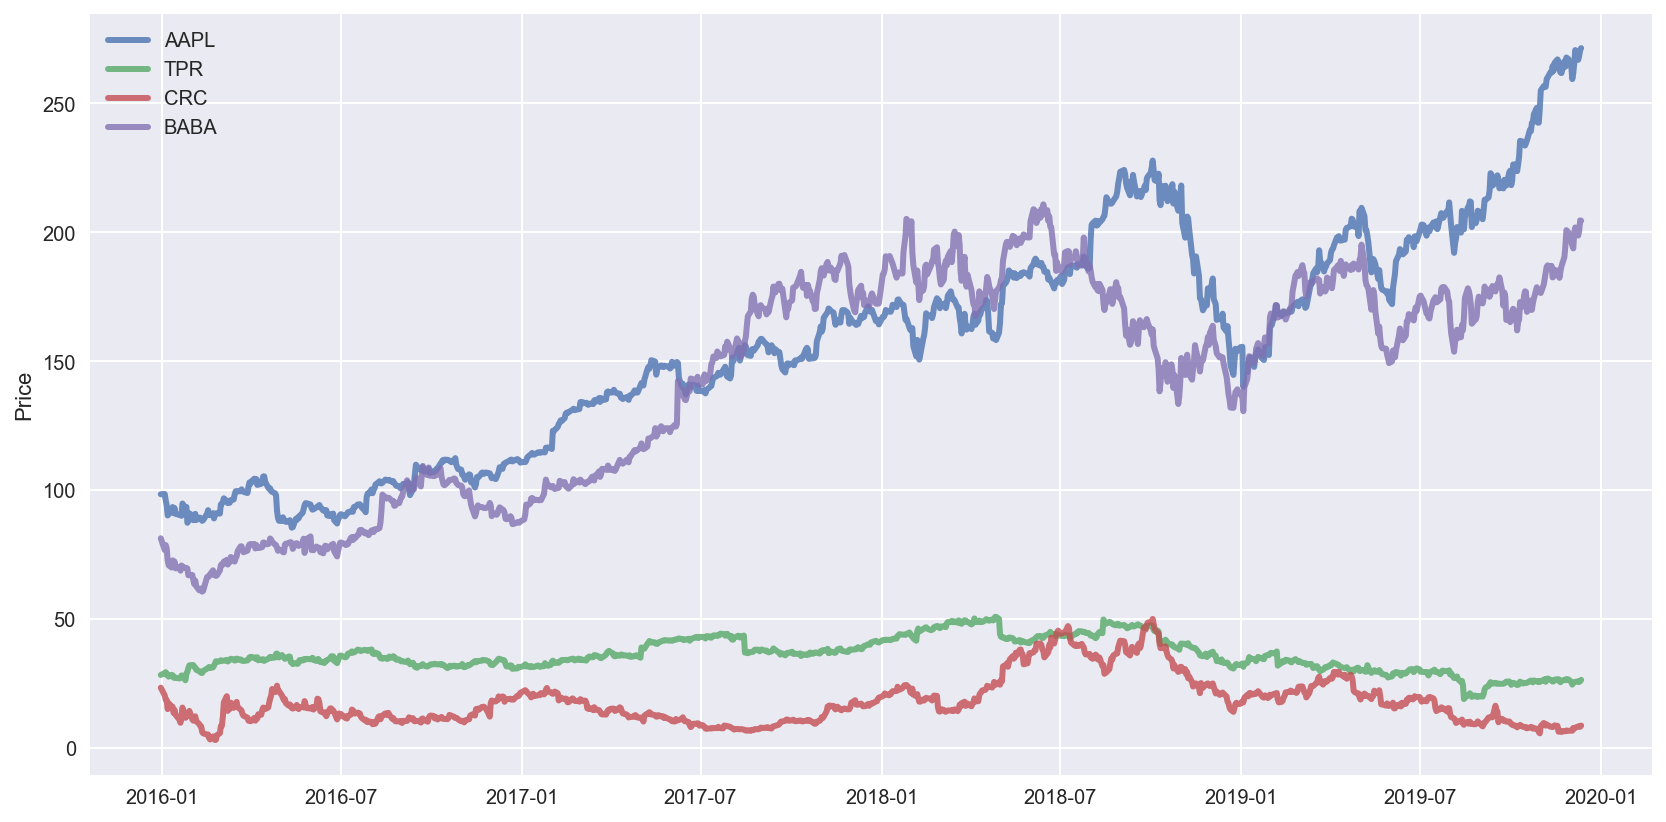

In [3]:
##Individual stock prices
plt.figure(figsize=(14, 7))
for c in tickers:
    plt.plot(portfolio.index, portfolio['Adj Close'][c], lw=3, alpha=0.8,label=c)
plt.legend()
plt.ylabel('Price')

In [4]:
# calculate returns
returns = portfolio.pct_change(1)
returns = returns.dropna(axis=0)  # drop first missing row
returns.head()

Adj Close                              
                AAPL      BABA       CRC       TPR
Date                                              
2016-01-04  0.000915 -0.056355 -0.128755  0.027975
2016-01-05 -0.025089  0.025297 -0.083744  0.009645
2016-01-06 -0.019587 -0.016533 -0.005376 -0.034800
2016-01-07 -0.042189 -0.059615 -0.189189  0.003181
2016-01-08  0.005326 -0.026403  0.153333 -0.028541

Text(0, 0.5, 'Returns')

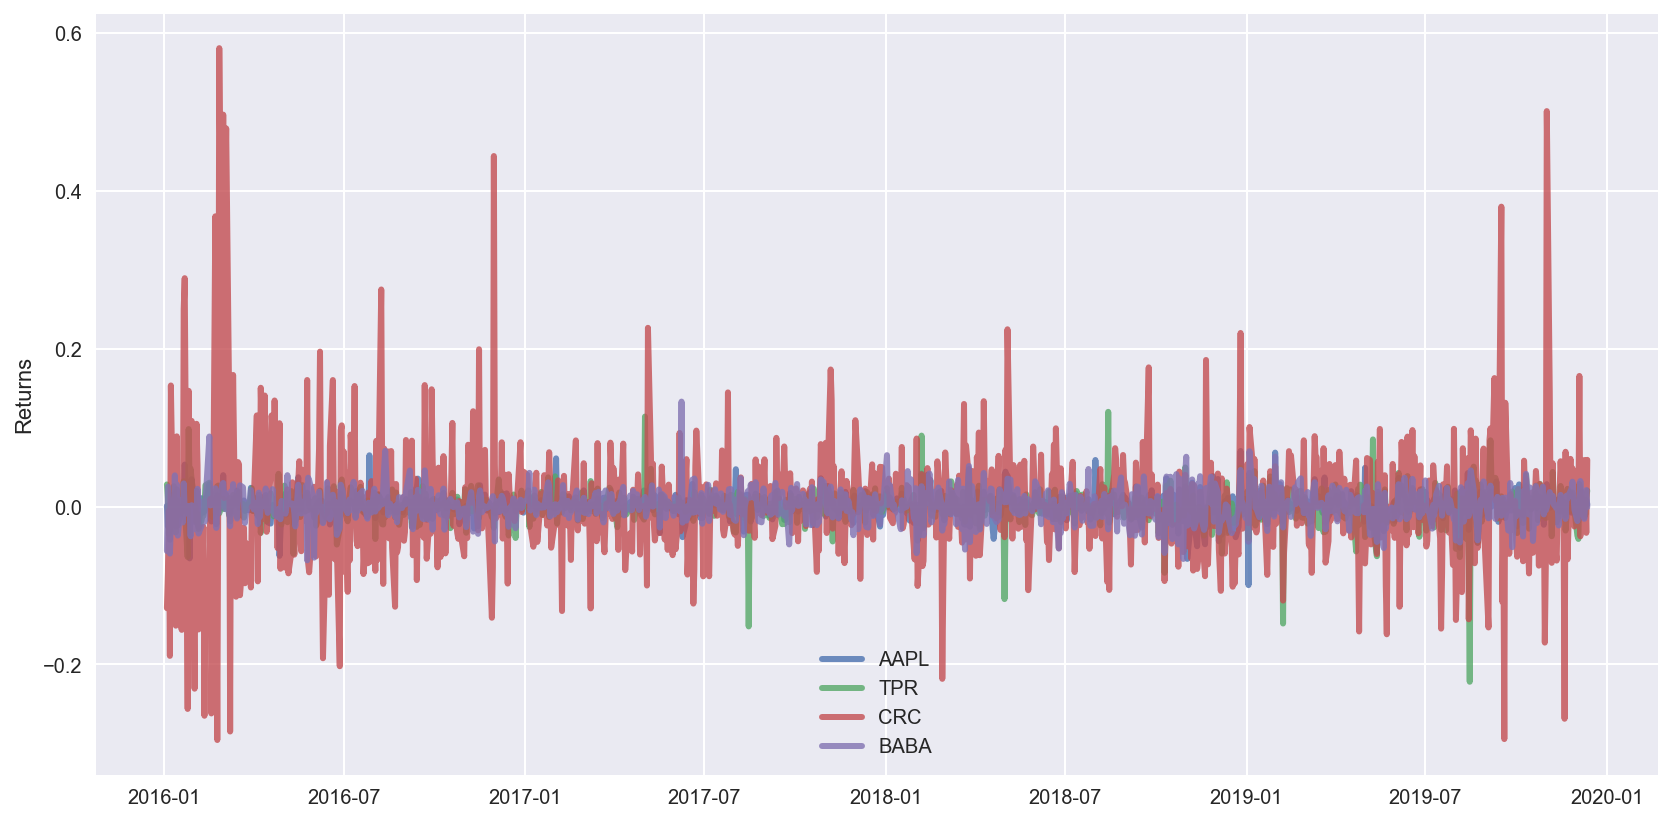

In [5]:
plt.figure(figsize=(14, 7))
for c in tickers:
    plt.plot(returns.index, returns['Adj Close'][c], lw=3, alpha=0.8,label=c)
plt.legend()
plt.ylabel('Returns')

In [6]:
corr = returns.corr()
corr

Adj Close                              
                    AAPL      BABA       CRC       TPR
Adj Close AAPL  1.000000  0.489819  0.277861  0.279815
          BABA  0.489819  1.000000  0.208018  0.227455
          CRC   0.277861  0.208018  1.000000  0.202056
          TPR   0.279815  0.227455  0.202056  1.000000

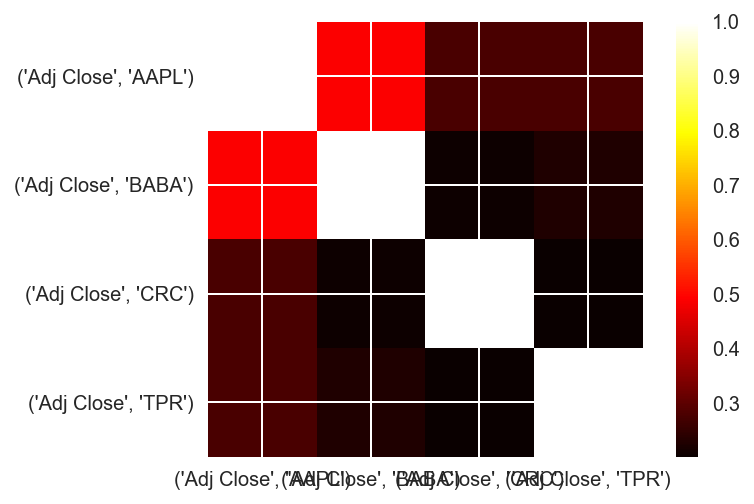

In [7]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

The stocks selected are not much correlated, values less than 0.5! Hence, this is a good portfolio

In [8]:
returns.shape

(994, 4)

### Weights of portfolio stocks

In [9]:
###Set parameters
N_PORTFOLIOS = 10 ** 5
N = 19
risky_assets = tickers
risky_assets.sort()
N_ASSETS = len(risky_assets)

#Average returns and covariance
avg_returns = returns.mean() * N
cov_mat = returns.cov() * N

##Simulate random portfolio weights

np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, N_ASSETS))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

####Calculate portfolio metrics:
port_returns = np.dot(weights, avg_returns)

port_std = []
for i in range(0, len(weights)):
    port_std.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
port_std = np.array(port_std)
    
port_sharpe_ratio = port_returns / port_std

##Joint dataframe with all data
port_resutls_df = pd.DataFrame({'returns': port_returns,
                                'volatility': port_std,
                                'sharpe_ratio': port_sharpe_ratio})

##Locate points creating efficient frontier
N_POINTS = 100
portfolio_returns_ef = np.round(np.linspace(port_resutls_df.returns.min(), port_resutls_df.returns.max(), N_POINTS), 2)
portfolio_volatility_ef = []
indices_to_skip = []

for point_index in range(N_POINTS):
    if portfolio_returns_ef[point_index] not in np.round(port_returns, 2):
        indices_to_skip.append(point_index)
        continue
    portfolio_volatility_ef.append(np.min(port_std[np.where(np.round(port_returns, 2) == portfolio_returns_ef[point_index])]))
    
portfolio_returns_ef = np.delete(portfolio_returns_ef, indices_to_skip)

#Identify the tangency portfolio
max_sharpe_portfolio = port_resutls_df.loc[np.argmax(port_resutls_df.sharpe_ratio)]

print('Maximum Sharpe ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portfolio.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(risky_assets, weights[np.argmax(port_resutls_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe ratio portfolio ----
Performance
returns: 2.16% volatility: 6.40% sharpe_ratio: 33.74% 
Weights
AAPL: 73.96% BABA: 23.65% CRC: 1.48% TPR: 0.90% 

#### Tangency portfolio has the weights as AAPL: 73.96% BABA: 23.65% CRC: 1.48% TPR: 0.9% 

Person is an aggresive to moderate risk taker and therefore, this selection is justified!

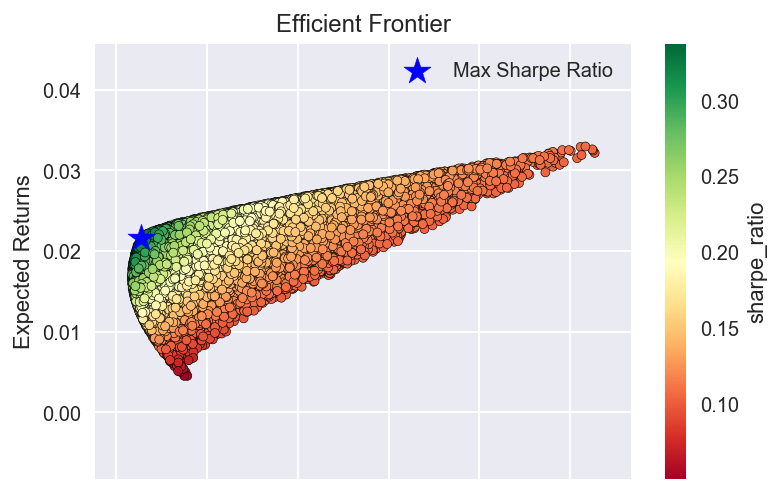

In [10]:
port_resutls_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio',
                     cmap='RdYlGn', edgecolors='black')
plt.scatter(x=max_sharpe_portfolio.volatility, y=max_sharpe_portfolio.returns, c='blue', 
            marker='*', s=200, label='Max Sharpe Ratio')

plt.xlabel("Volatility")
plt.ylabel("Expected Returns")
plt.title('Efficient Frontier')
plt.legend()
plt.show()

In [11]:
##Calculate portfolio returns
numstocks = 4
weights = [0.7396,0.2365,0.0148,0.009]
port_returns = returns.iloc[:,0:numstocks].mul(weights, axis=1).sum(axis=1)
port_returns=pd.DataFrame(port_returns,columns=['port_ret'])
port_returns = port_returns.reset_index()
port_returns.head()

Date  port_ret
0 2016-01-04 -0.014305
1 2016-01-05 -0.013726
2 2016-01-06 -0.018790
3 2016-01-07 -0.048073
4 2016-01-08 -0.000293

In [12]:
#Calculate portfolio value based on company values
port_value = portfolio['Adj Close'][['AAPL','TPR','CRC','BABA']].sum(axis=1)
port_value = pd.DataFrame(port_value,columns=['Value'])
port_value = port_value.reset_index()
port_value.head()

Date   Value
0 2015-12-31  231.17
1 2016-01-04  224.47
2 2016-01-05  222.52
3 2016-01-06  218.22
4 2016-01-07  206.23

Closing prices:


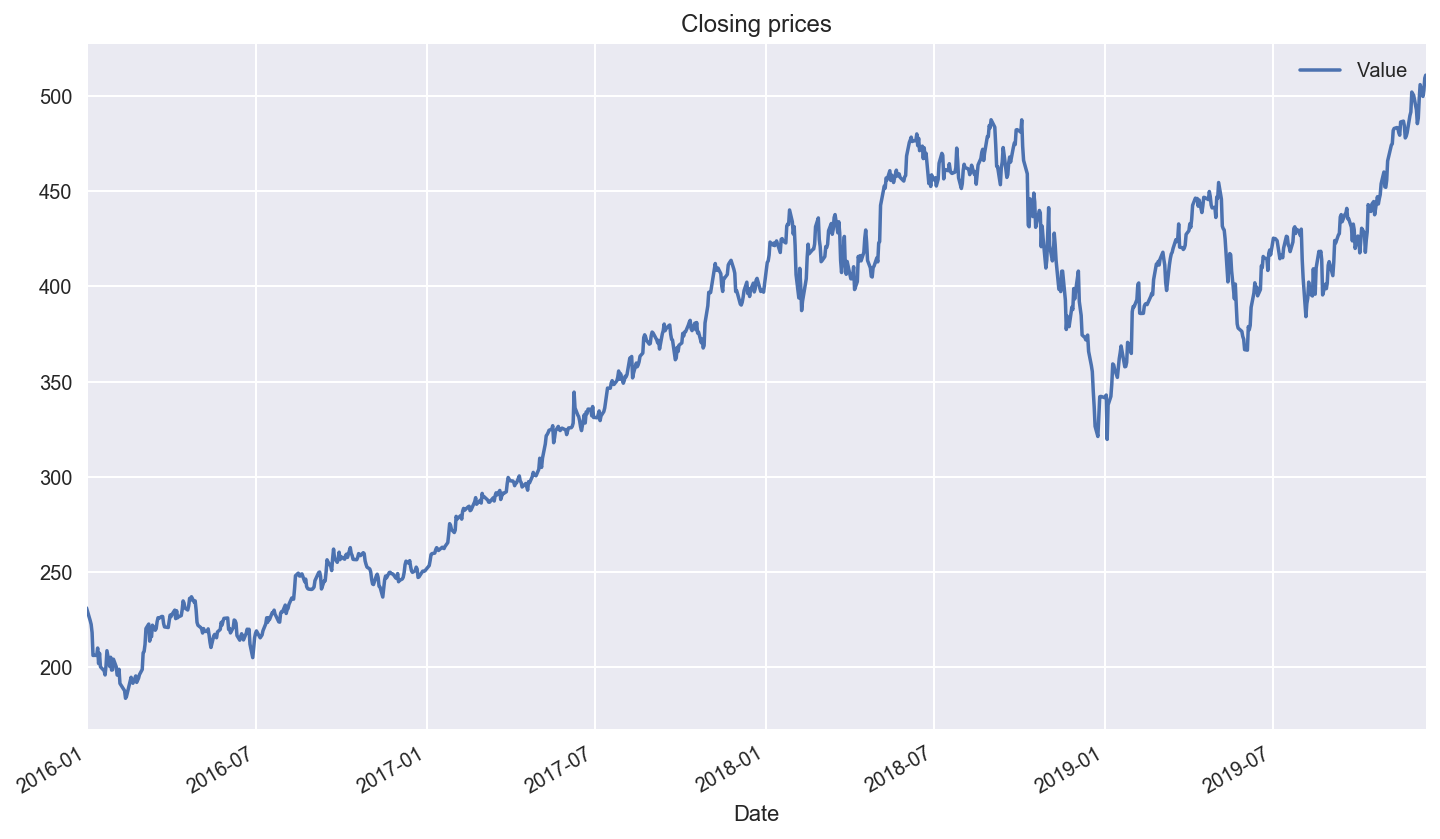

Stock returns
Returns distribution


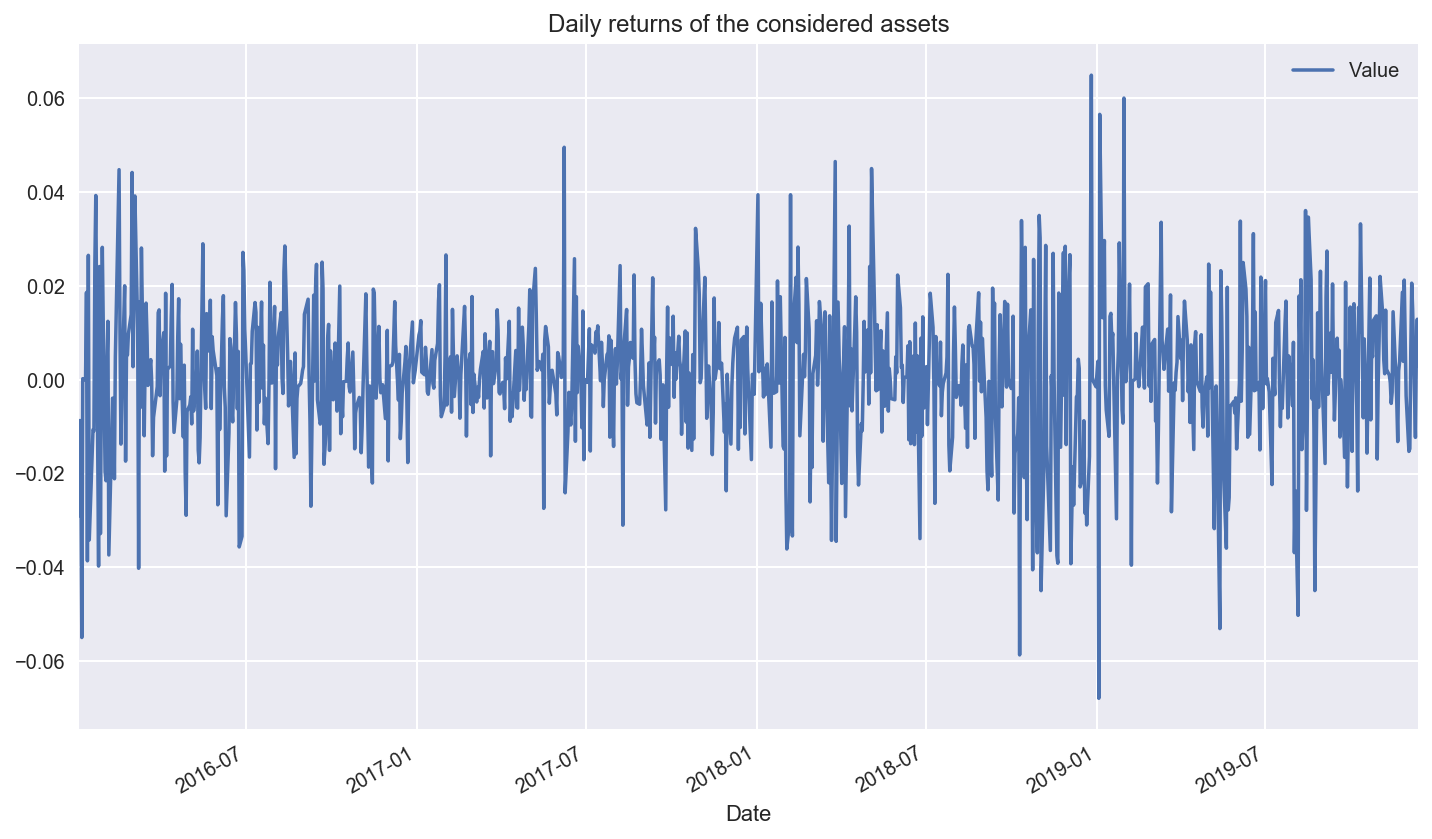

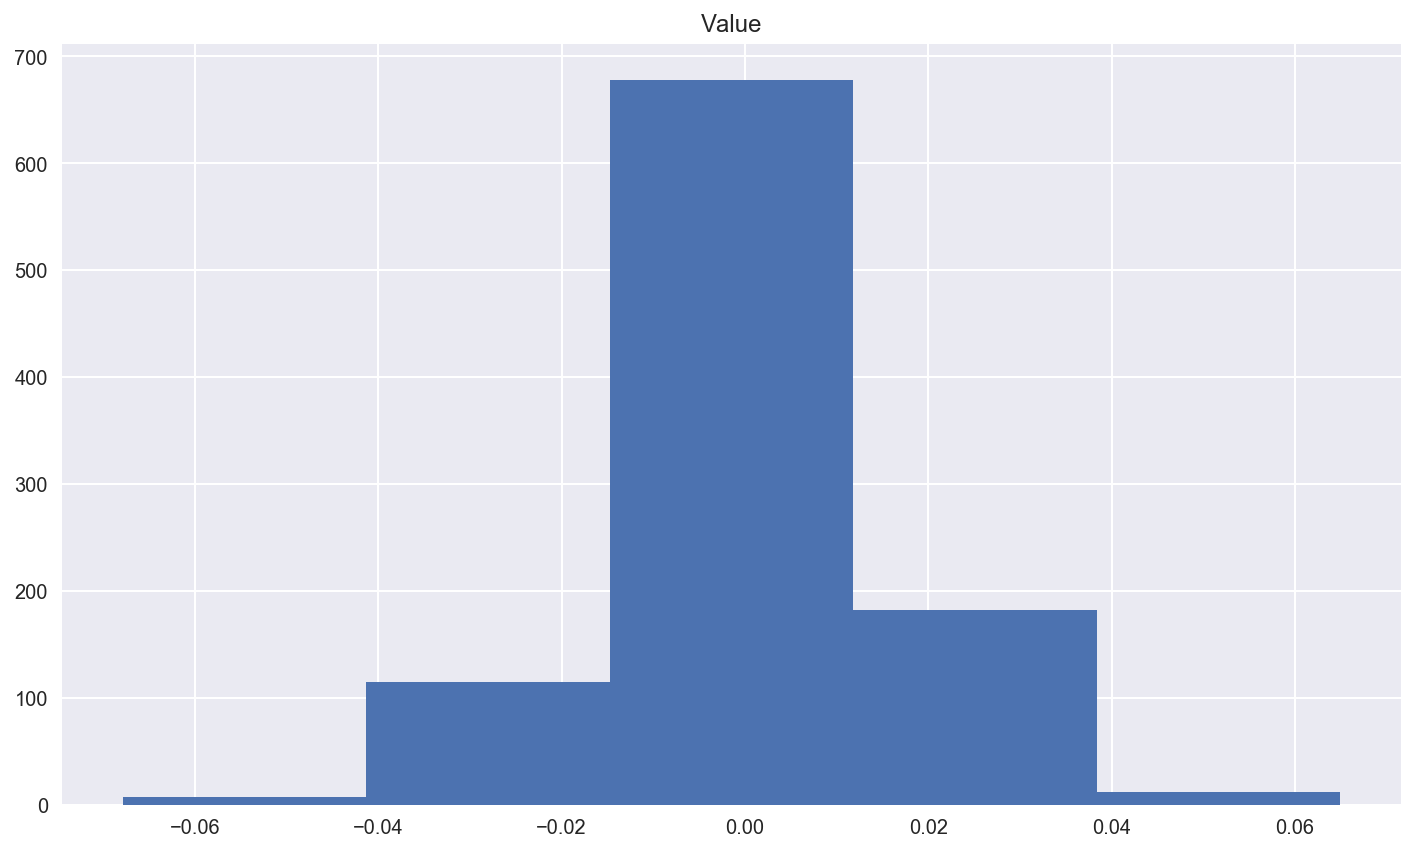

Value at risk and Expected shortfall
VaR is: -2.61 %
CVaR is: Value   -3.56
dtype: float64 %




In [13]:
porvals = port_value
porvals = porvals.set_index(['Date'])
#porvals = porvals.drop(columns=['Date'])
porvals.head()

print('Closing prices:')
porvals.plot(title='Closing prices', figsize=(12,7))
plt.show()
    
print("Stock returns")
returns = porvals.pct_change().dropna()
returns.plot(title='Daily returns of the considered assets', figsize=(12,7))
    
print('Returns distribution')
returns.hist(bins=5,sharex=True, figsize=(12,7))
plt.show()
    
print('Value at risk and Expected shortfall')
ret = pd.DataFrame(returns)
var_level = 95
#VaR and Expected shortfall

var_95 = np.percentile(ret, 100 - var_level)
cvar_95 = ret[ret <= var_95].mean() 
print('VaR is:',round((var_95*100),2),'%')
print('CVaR is:',round((cvar_95*100),2),'%')
print('\n')

### Simulation

Initial stock price: 510.9
Time increments: 1
No of days for predicting: 78
Time points: 78.0
Time progression array: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78]
Returns: 0.001137000410589638
Standard deviation: 0.014682224695488367


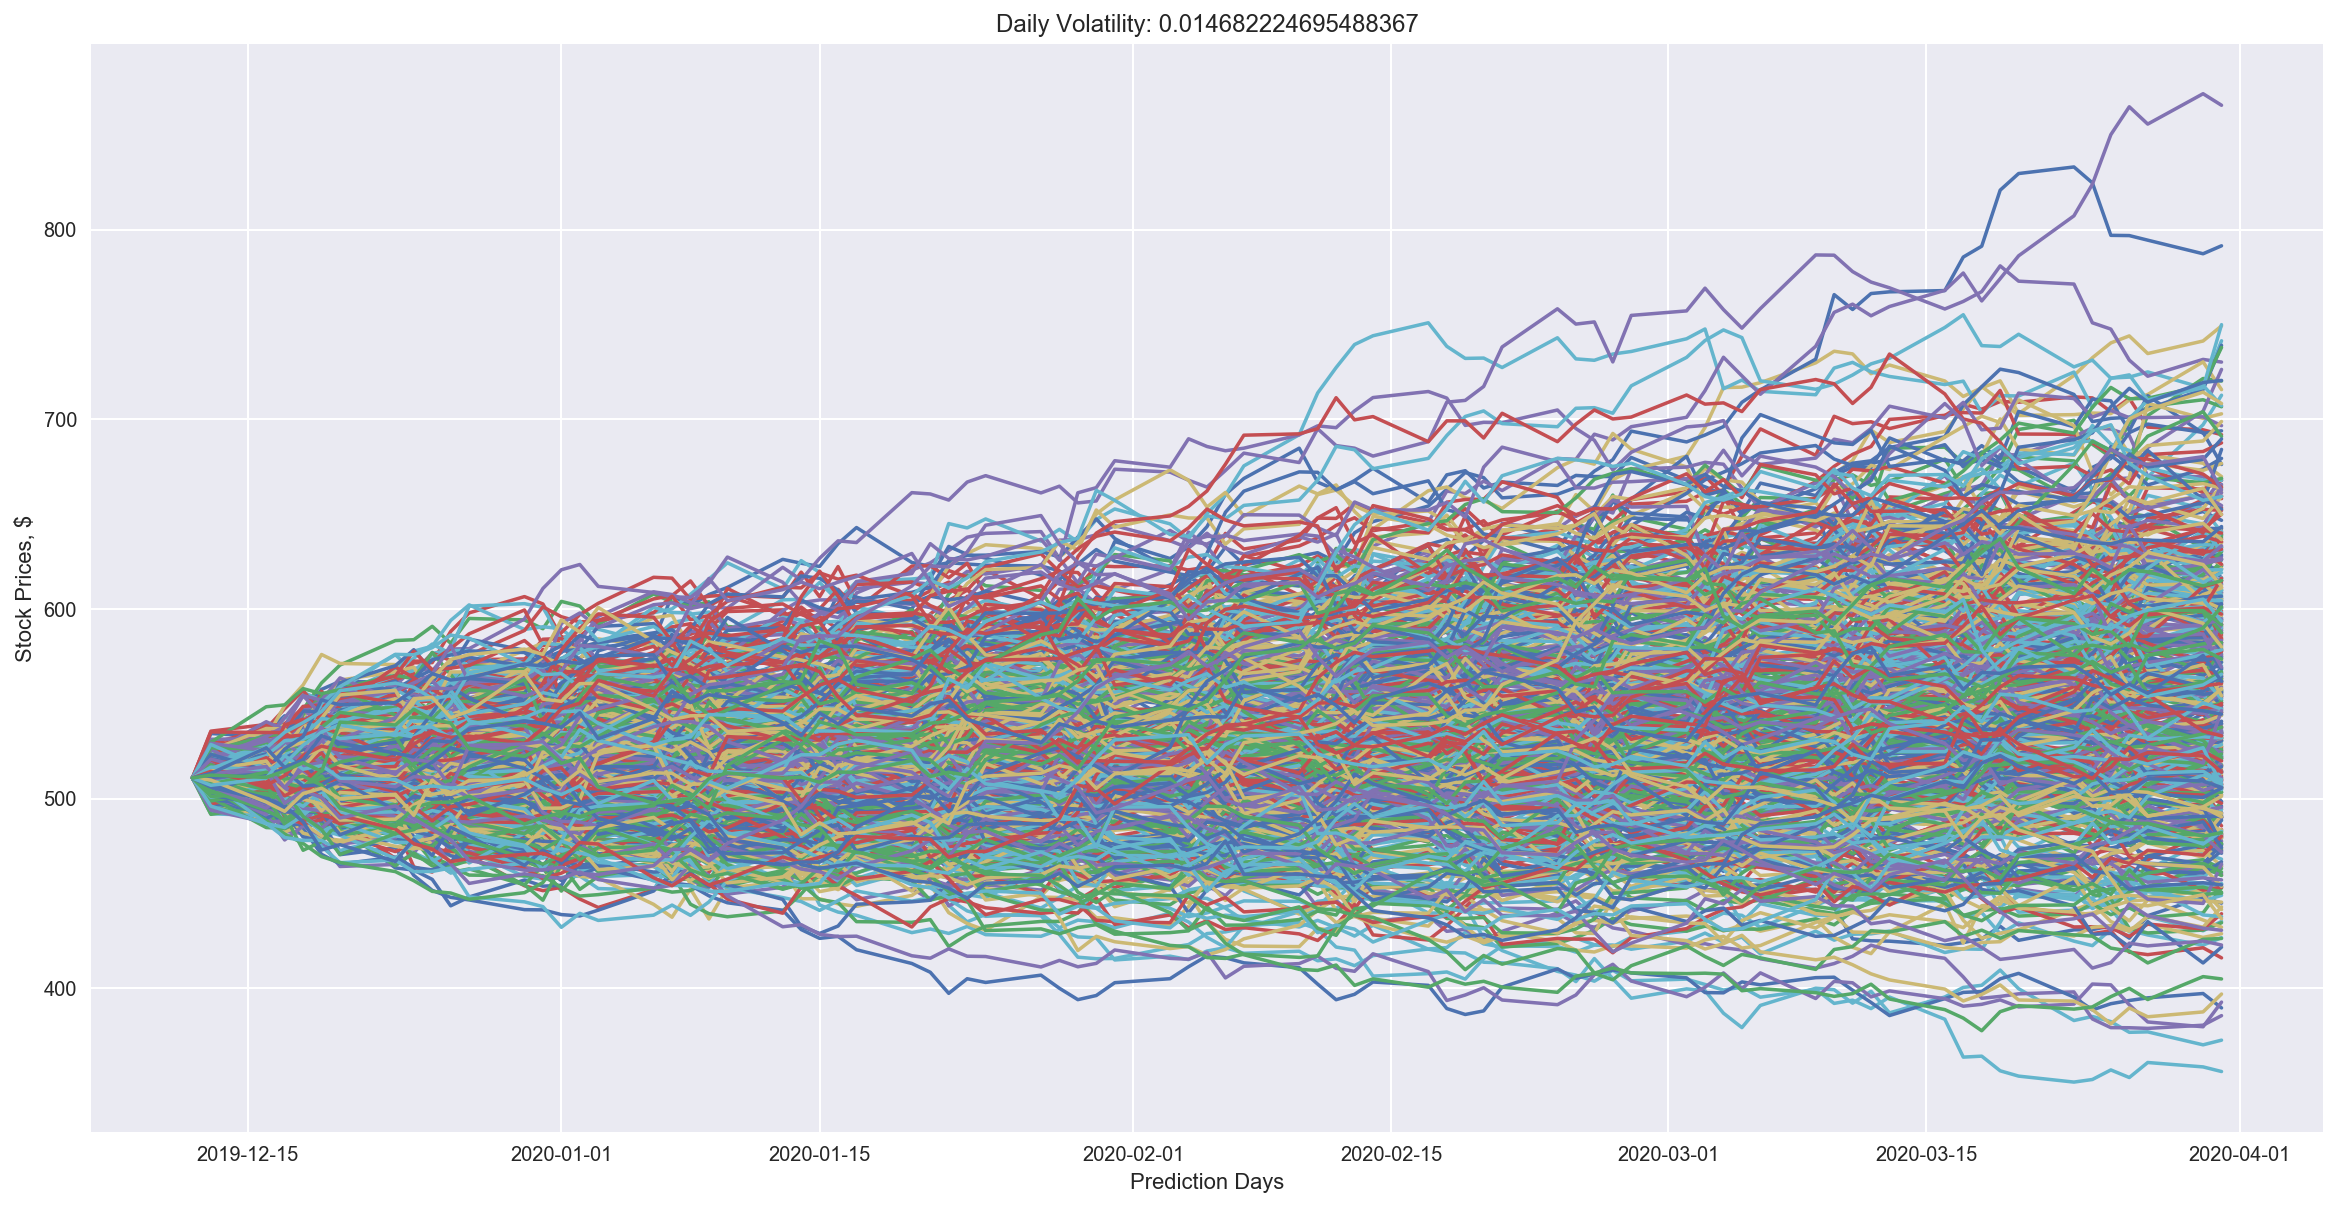

In [14]:
#Initial stock price
end = port_value.loc[port_value.shape[0] - 1, "Value"]
print('Initial stock price:',end)

#Time increments dt
dt = 1
print('Time increments:',dt)

#No of days to be predicted
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
              format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
              end = pd.to_datetime(pred_end_date, 
              format = "%Y-%m-%d")).to_series(
              ).map(lambda x: 
              1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays
print('No of days for predicting:',T)

#Time points
N = T / dt
print('Time points:',N)

#Time progression array
t = np.arange(1, int(N) + 1)
print('Time progression array:',t)

#Mean returns
returns = port_returns['port_ret']

mu = np.mean(returns)
print('Returns:',mu)

#Standard deviation
sigma = np.std(returns)
print('Standard deviation:',sigma)

#array for random
scen_size = 500
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}

#Brownian path
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

#Drift and diffusion
drift = (mu - 0.5 * sigma**2) * t
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}

#Predictions
S = np.array([end * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[end] for scen in range(scen_size)]), S))

# Plotting the simulations
plt.figure(figsize = (20,10))

for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = port_value["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, $')
    plt.xlabel('Prediction Days')
    
plt.show()

In [15]:
maxi = S.max()
mini = S.min()

print('Max the price can go to:',maxi)
print('Min the price can go to:',mini)

Max the price can go to: 871.7239565503046
Min the price can go to: 350.5325432359076


In [16]:
ret_rate_max = (maxi - end)/end * 100
ret_rate_min = (mini - end)/end * 100

print('Max the return rate can go to:',ret_rate_max,'%')
print('Min the return rate can go to:',ret_rate_min,'%')

Max the return rate can go to: 70.62516276185255 %
Min the return rate can go to: -31.38920664789438 %
